In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('/content/Coffee_Stores_Data.csv')


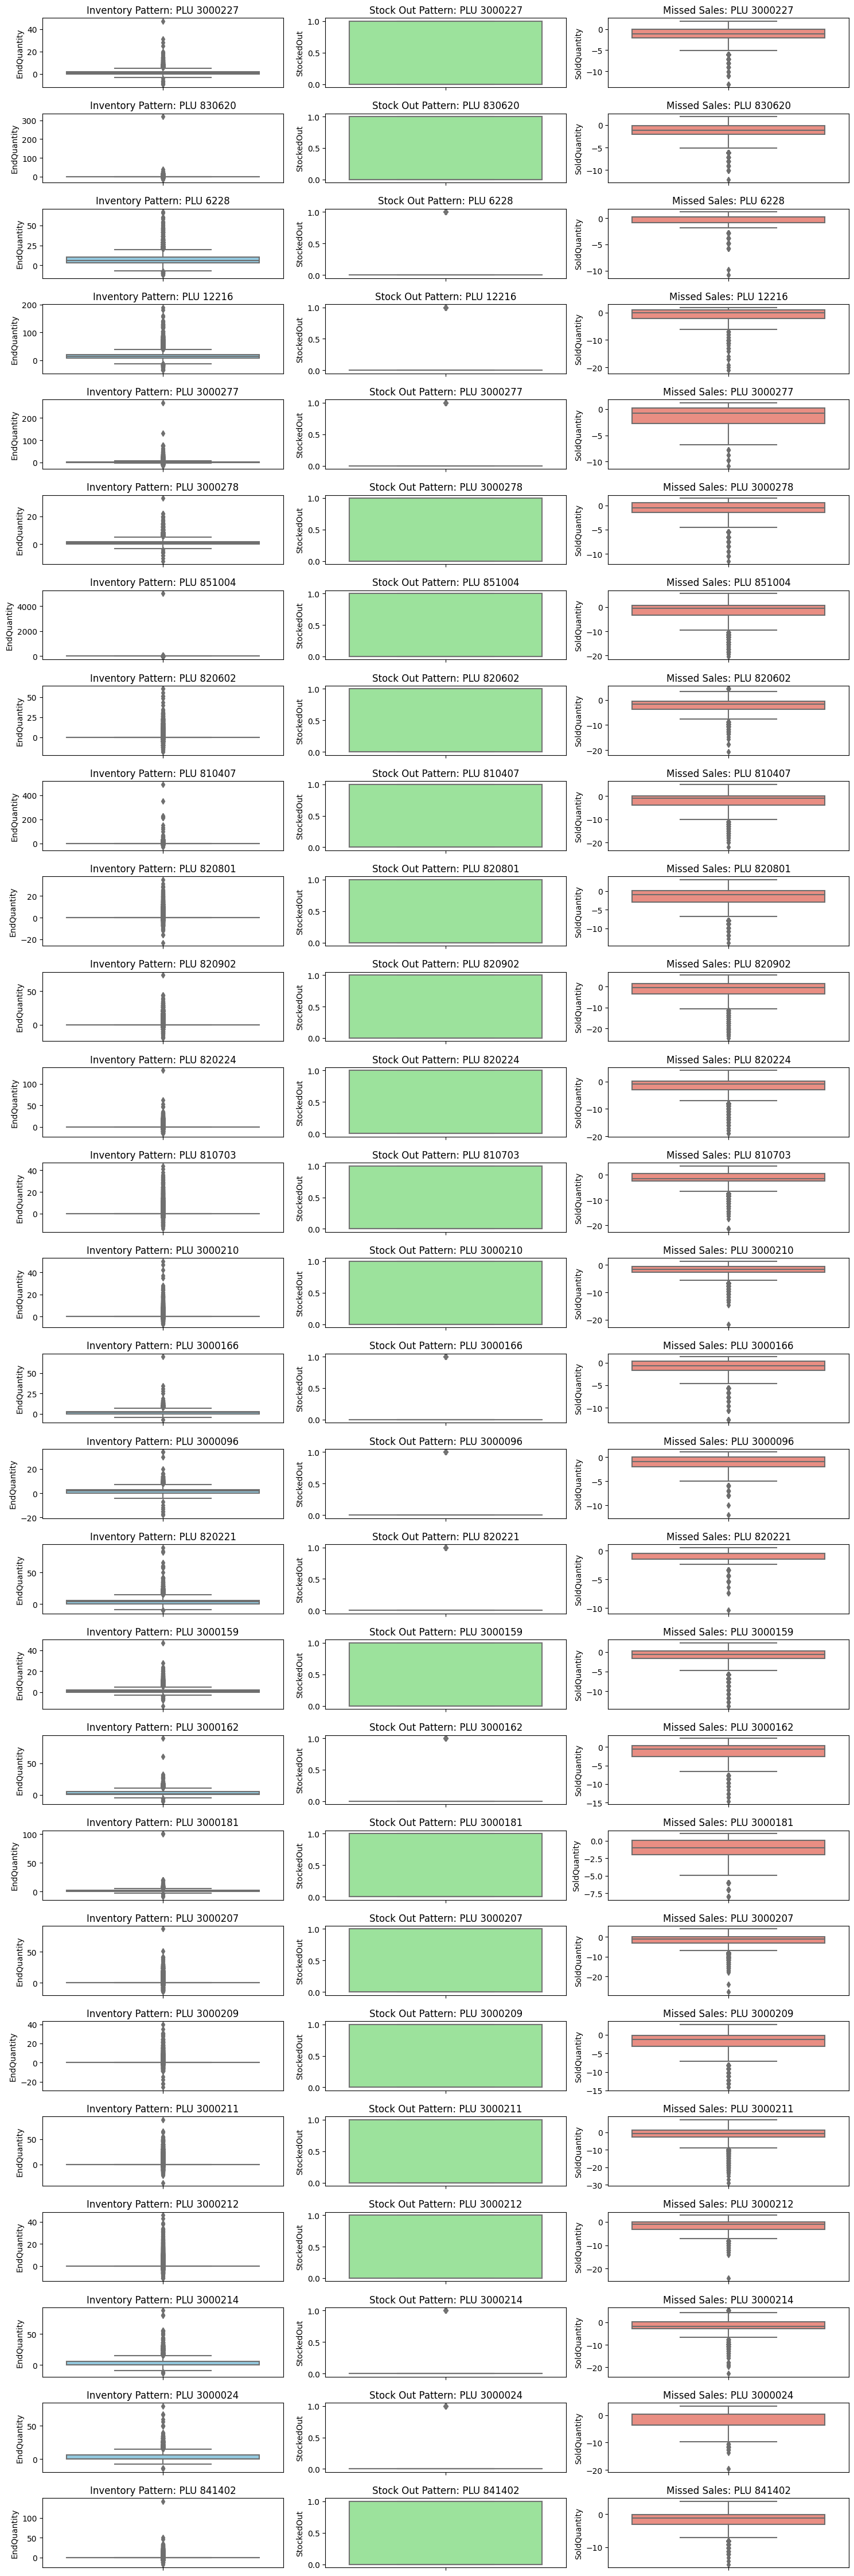

In [ ]:
unique_products = df['PLU'].unique()[:27]
def calculate_missed_sales(group):
    avg_sales_no_stockout = group[group['StockedOut'] == 0]['SoldQuantity'].mean()
    sales_stockout = group[group['StockedOut'] == 1]['SoldQuantity']
    missed_sales = avg_sales_no_stockout - sales_stockout
    return missed_sales

fig, axes = plt.subplots(nrows=27, ncols=3, figsize=(15, 45))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, plu in enumerate(unique_products):
    product_data = df[df['PLU'] == plu]

    sns.boxplot(y=product_data['EndQuantity'], ax=axes[i, 0], color='skyblue').set_title(f'Inventory Pattern: PLU {plu}')

    sns.boxplot(y=product_data['StockedOut'], ax=axes[i, 1], color='lightgreen').set_title(f'Stock Out Pattern: PLU {plu}')

    missed_sales = calculate_missed_sales(product_data)
    sns.boxplot(y=missed_sales, ax=axes[i, 2], color='salmon').set_title(f'Missed Sales: PLU {plu}')

plt.tight_layout()

plt.show()



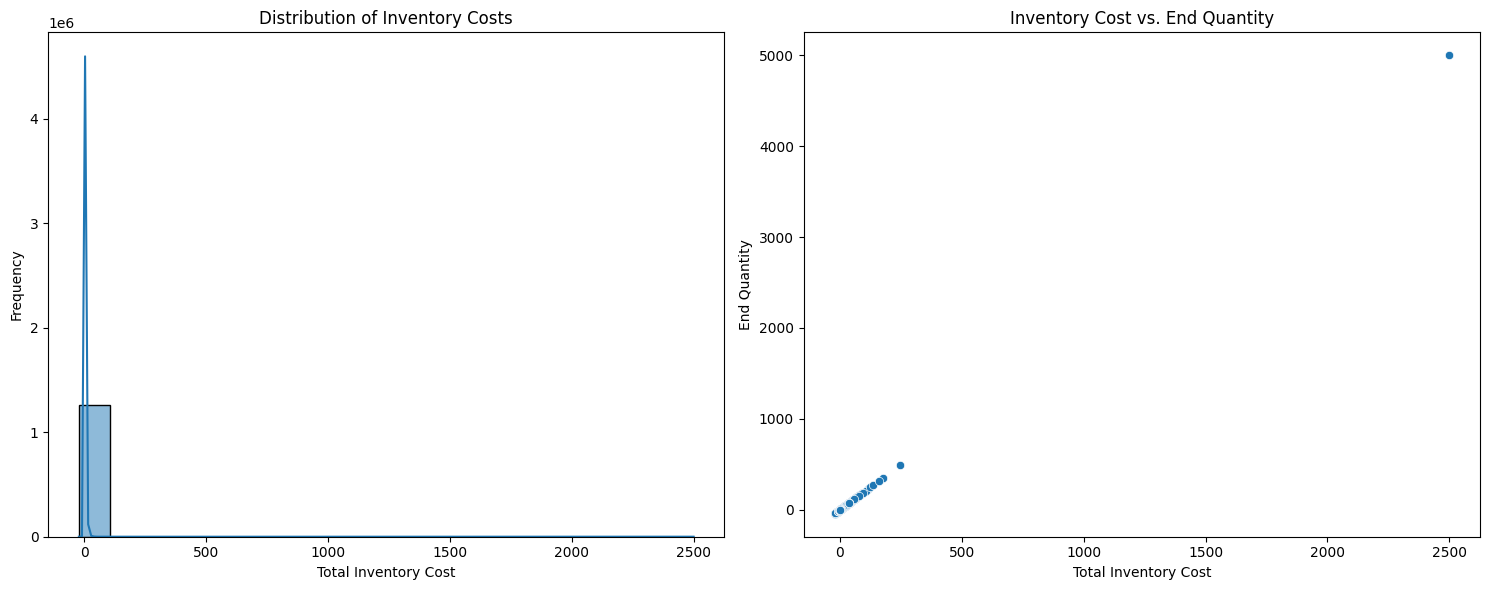

Insights:
1. The distribution of inventory costs is right-skewed, suggesting that a few products contribute significantly to inventory costs.
2. There is a positive correlation between total inventory cost and end quantity, indicating more stock for higher-cost products.


In [ ]:
file_path = ('/content/Coffee_Stores_Data.csv')
coffee_data = pd.read_csv(file_path)

average_cost = 0.5
coffee_data['InventoryCost'] = coffee_data['EndQuantity'] * average_cost

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(coffee_data['InventoryCost'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Inventory Costs')
axes[0].set_xlabel('Total Inventory Cost')
axes[0].set_ylabel('Frequency')

sns.scatterplot(x='InventoryCost', y='EndQuantity', data=coffee_data, ax=axes[1])
axes[1].set_title('Inventory Cost vs. End Quantity')
axes[1].set_xlabel('Total Inventory Cost')
axes[1].set_ylabel('End Quantity')

plt.tight_layout()
plt.show()


print("Insights:")
print("1. The distribution of inventory costs is right-skewed, suggesting that a few products contribute significantly to inventory costs.")
print("2. There is a positive correlation between total inventory cost and end quantity, indicating more stock for higher-cost products.")

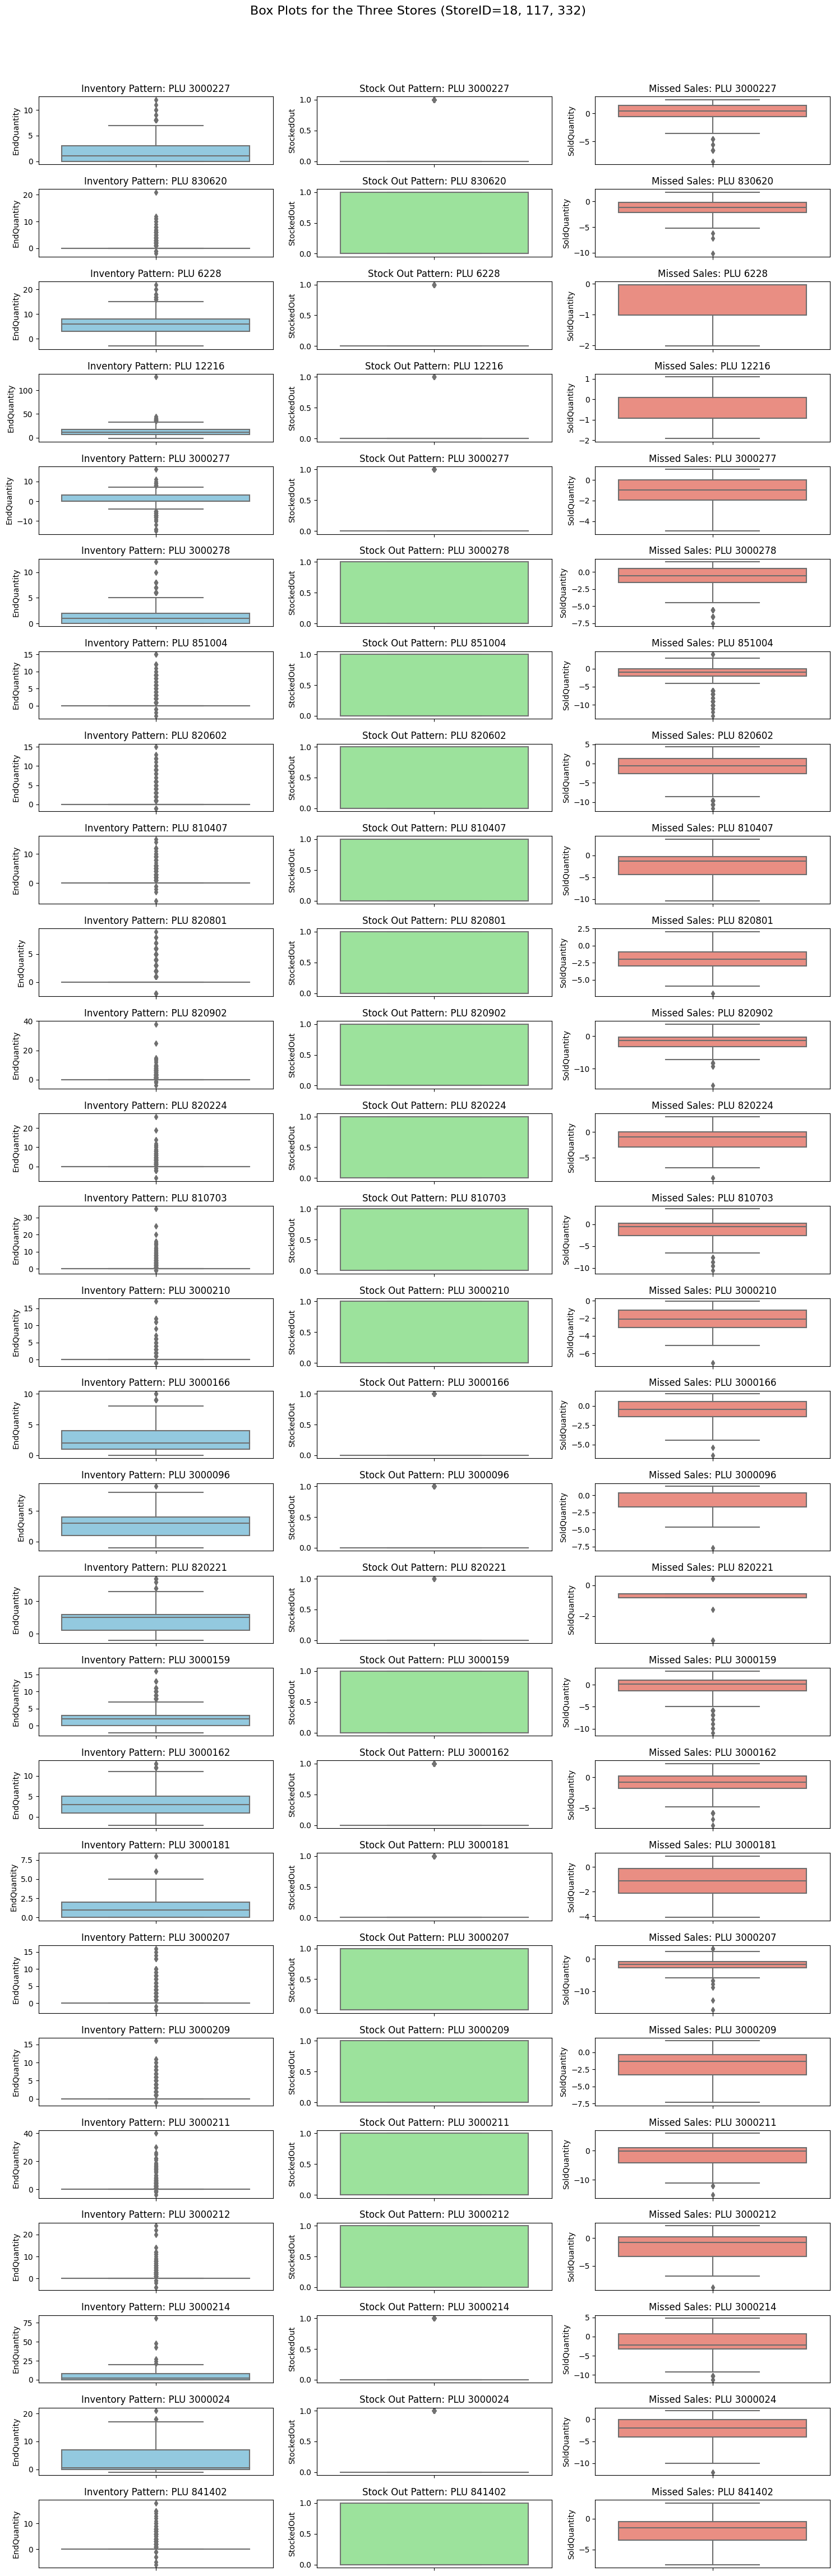

In [ ]:
filtered_df = df[df['StoreID'].isin([18, 117, 332])]

unique_products = filtered_df['PLU'].unique()[:27]

def calculate_missed_sales(group):
    avg_sales_no_stockout = group[group['StockedOut'] == 0]['SoldQuantity'].mean()
    sales_stockout = group[group['StockedOut'] == 1]['SoldQuantity']
    missed_sales = avg_sales_no_stockout - sales_stockout
    return missed_sales

fig, axes = plt.subplots(nrows=27, ncols=3, figsize=(15, 45))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

plt.suptitle("Box Plots for the Three Stores (StoreID=18, 117, 332)", fontsize=16, y=1.02)

for i, plu in enumerate(unique_products):
    product_data = filtered_df[filtered_df['PLU'] == plu]

    sns.boxplot(y=product_data['EndQuantity'], ax=axes[i, 0], color='skyblue').set_title(f'Inventory Pattern: PLU {plu}')

    sns.boxplot(y=product_data['StockedOut'], ax=axes[i, 1], color='lightgreen').set_title(f'Stock Out Pattern: PLU {plu}')

    missed_sales = calculate_missed_sales(product_data)
    sns.boxplot(y=missed_sales, ax=axes[i, 2], color='salmon').set_title(f'Missed Sales: PLU {plu}')

plt.tight_layout()

plt.show()

Best Selling Product in the Top 25%:
Description
Muffin - Blueberry Streusel    337799.0
Name: SoldQuantity, dtype: float64

Worst Selling Product in the Top 25%:
Description
Chocolate Croissant    220494.0
Name: SoldQuantity, dtype: float64


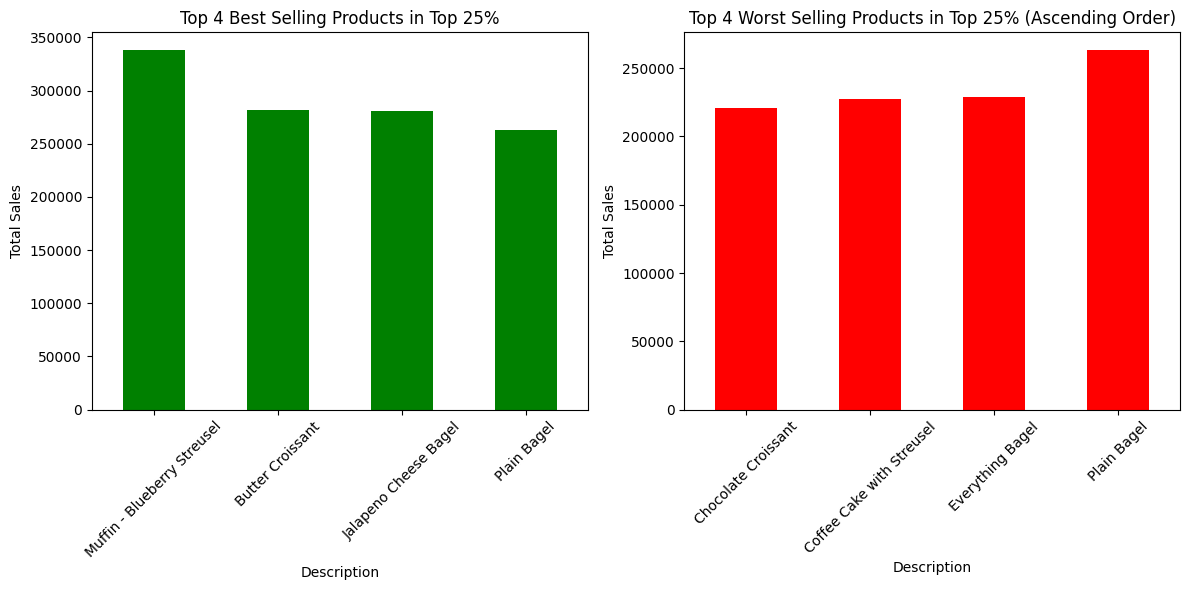

In [ ]:

total_sales_per_product = df.groupby('Description')['SoldQuantity'].sum()

sorted_sales = total_sales_per_product.sort_values(ascending=False)

top_25_percent_cutoff = int(len(sorted_sales) * 0.25)
top_25_percent_products = sorted_sales.head(top_25_percent_cutoff)

best_selling_in_top_25 = top_25_percent_products.head(1)
worst_selling_in_top_25 = top_25_percent_products.tail(1)

print("Best Selling Product in the Top 25%:")
print(best_selling_in_top_25)

print("\nWorst Selling Product in the Top 25%:")
print(worst_selling_in_top_25)




total_sales_per_product = df.groupby('Description')['SoldQuantity'].sum()

sorted_sales = total_sales_per_product.sort_values(ascending=False)

top_25_percent_cutoff = int(len(sorted_sales) * 0.25)
top_25_percent_products = sorted_sales.head(top_25_percent_cutoff)

top_4_selling = top_25_percent_products.head(4)
bottom_4_selling = top_25_percent_products.tail(4).sort_values(ascending=True)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_4_selling.plot(kind='bar', color='green')
plt.title('Top 4 Best Selling Products in Top 25%')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
bottom_4_selling.plot(kind='bar', color='red')
plt.title('Top 4 Worst Selling Products in Top 25% (Ascending Order)')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()

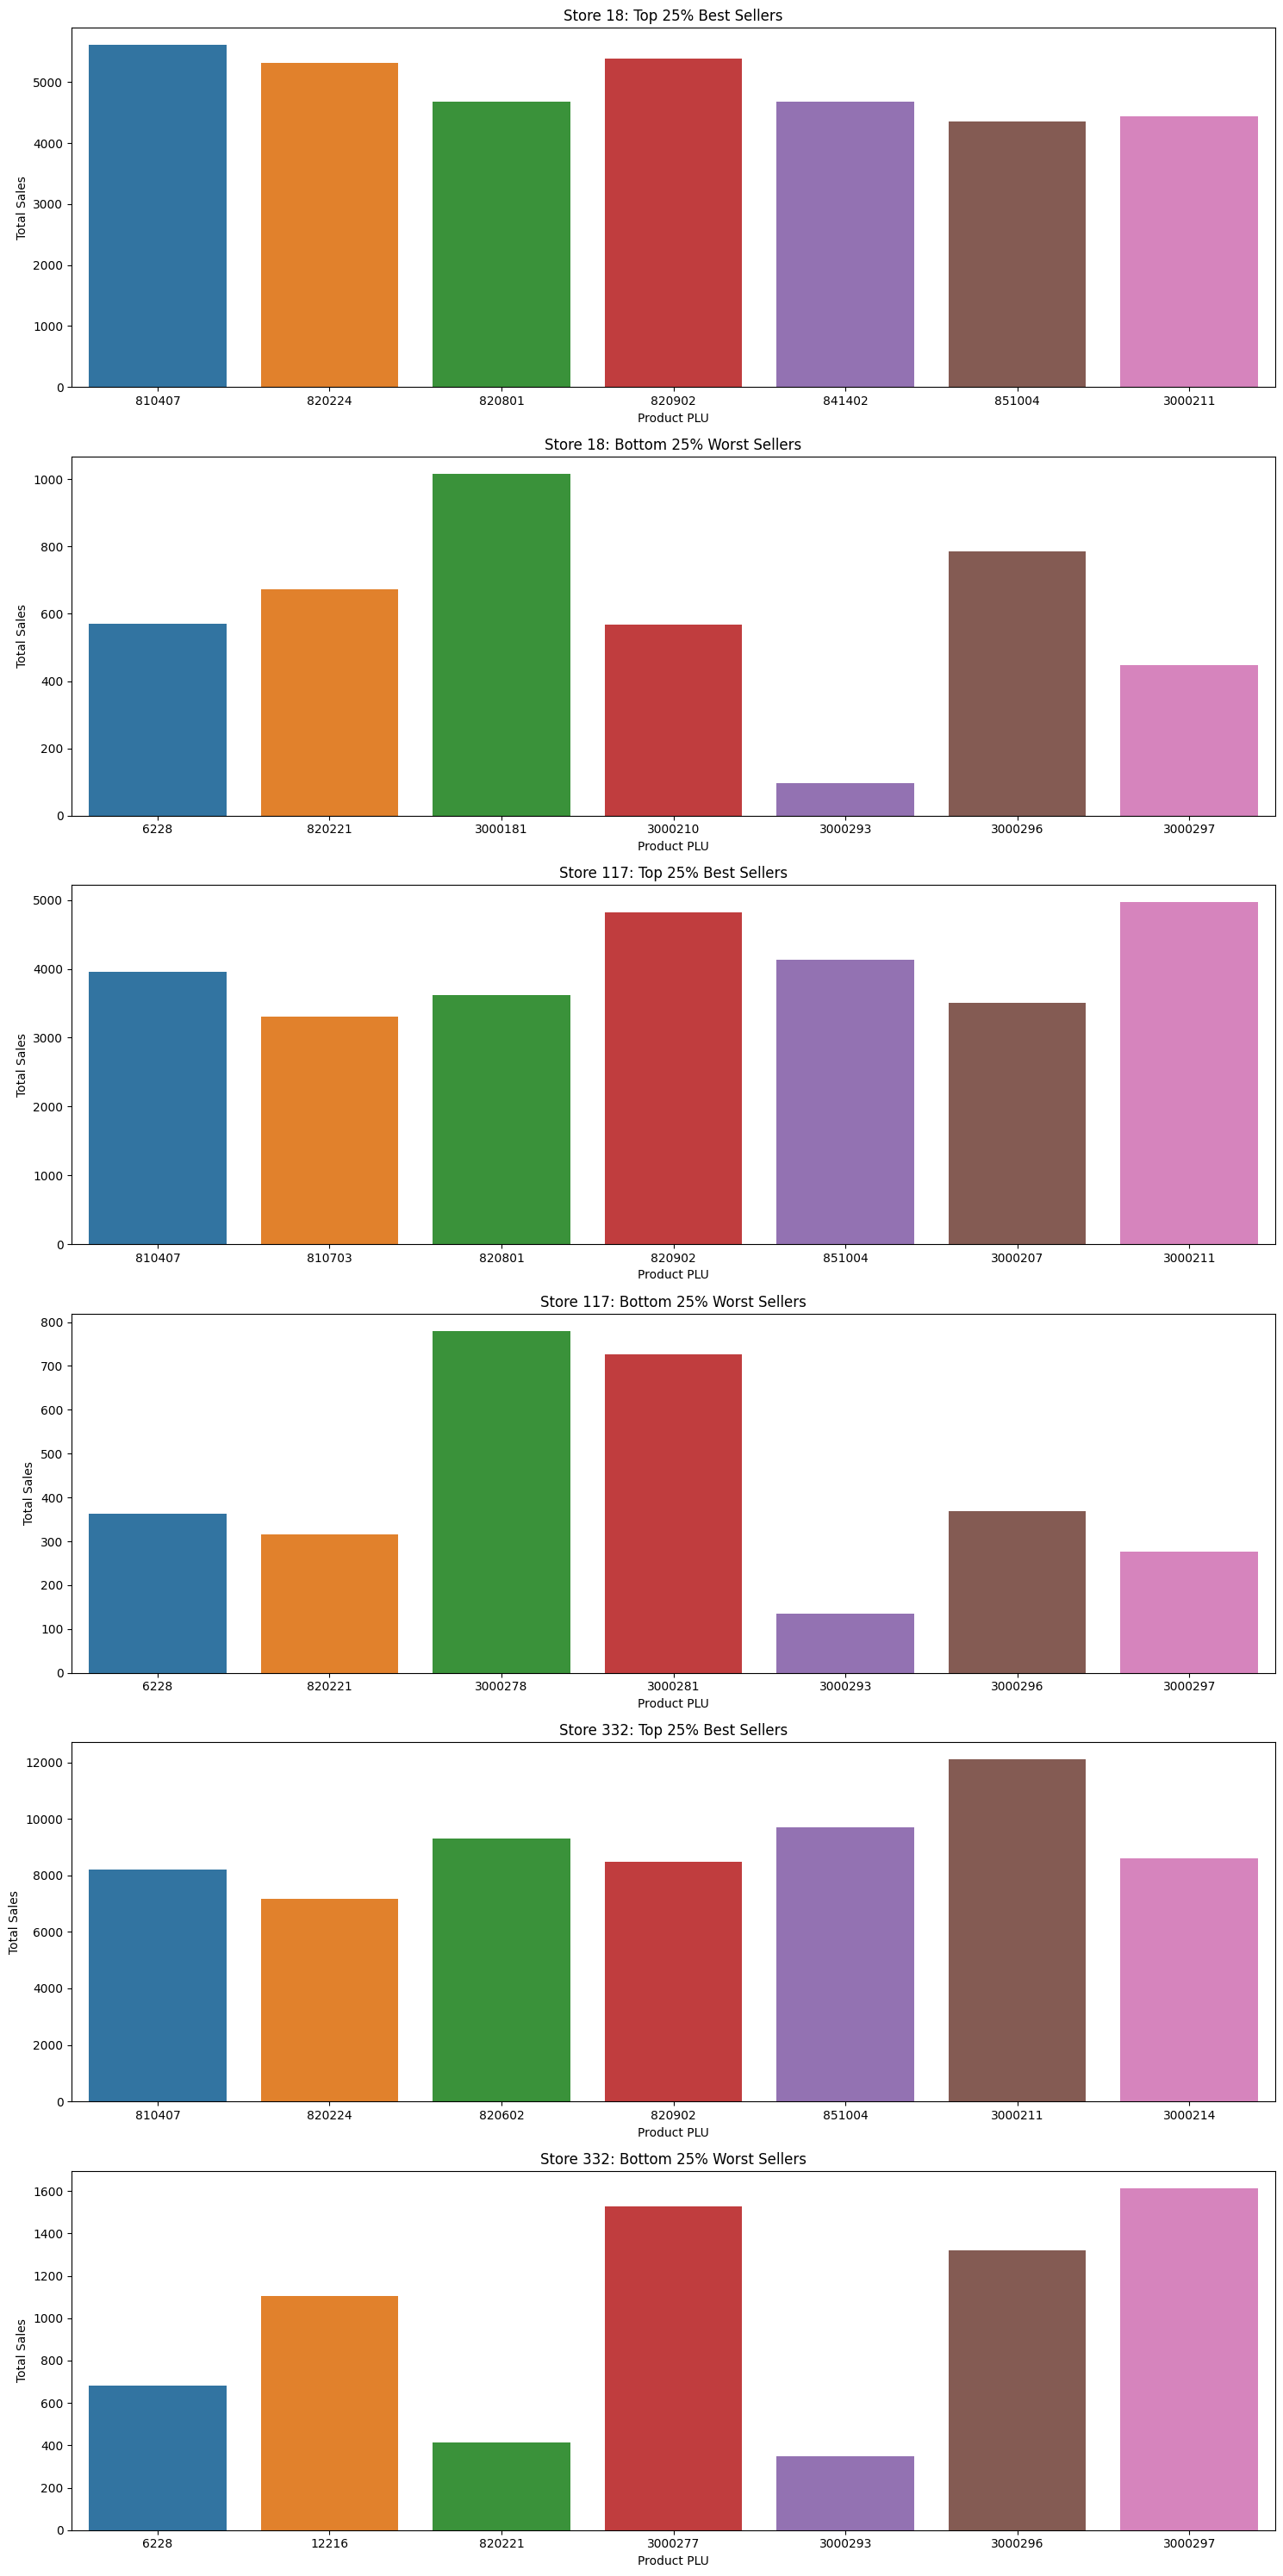

In [ ]:

data = pd.read_csv('/content/Coffee_Stores_Data.csv')
selected_stores = data[data['StoreID'].isin([18, 117, 332])].copy()

selected_stores['TotalSales'] = selected_stores['SoldQuantity'] * 3  # Average selling price is $3

store_sales = selected_stores.groupby(['StoreID', 'PLU'])['TotalSales'].sum().reset_index()

def get_top_bottom_products(store_sales_data):
    sorted_sales = store_sales_data.sort_values('TotalSales', ascending=False)
    n = len(sorted_sales)
    if n == 0:
        return pd.DataFrame(), pd.DataFrame()
    top_25_percent = sorted_sales.head(max(int(n * 0.25), 1))
    bottom_25_percent = sorted_sales.tail(max(int(n * 0.25), 1))
    return top_25_percent, bottom_25_percent

top_25_18, bottom_25_18 = get_top_bottom_products(store_sales[store_sales['StoreID'] == 18])
top_25_117, bottom_25_117 = get_top_bottom_products(store_sales[store_sales['StoreID'] == 117])
top_25_332, bottom_25_332 = get_top_bottom_products(store_sales[store_sales['StoreID'] == 332])

fig, axes = plt.subplots(6, 1, figsize=(15, 30))

def plot_store_sales(ax, data, title):
    if not data.empty:
        sns.barplot(ax=ax, x='PLU', y='TotalSales', data=data)
        ax.set_title(title)
        ax.set_xlabel('Product PLU')
        ax.set_ylabel('Total Sales')
    else:
        ax.set_title(title + " (No Data)")
        ax.set_axis_off()

plot_store_sales(axes[0], top_25_18, 'Store 18: Top 25% Best Sellers')
plot_store_sales(axes[1], bottom_25_18, 'Store 18: Bottom 25% Worst Sellers')

plot_store_sales(axes[2], top_25_117, 'Store 117: Top 25% Best Sellers')
plot_store_sales(axes[3], bottom_25_117, 'Store 117: Bottom 25% Worst Sellers')

plot_store_sales(axes[4], top_25_332, 'Store 332: Top 25% Best Sellers')
plot_store_sales(axes[5], bottom_25_332, 'Store 332: Bottom 25% Worst Sellers')

plt.tight_layout()
plt.show()

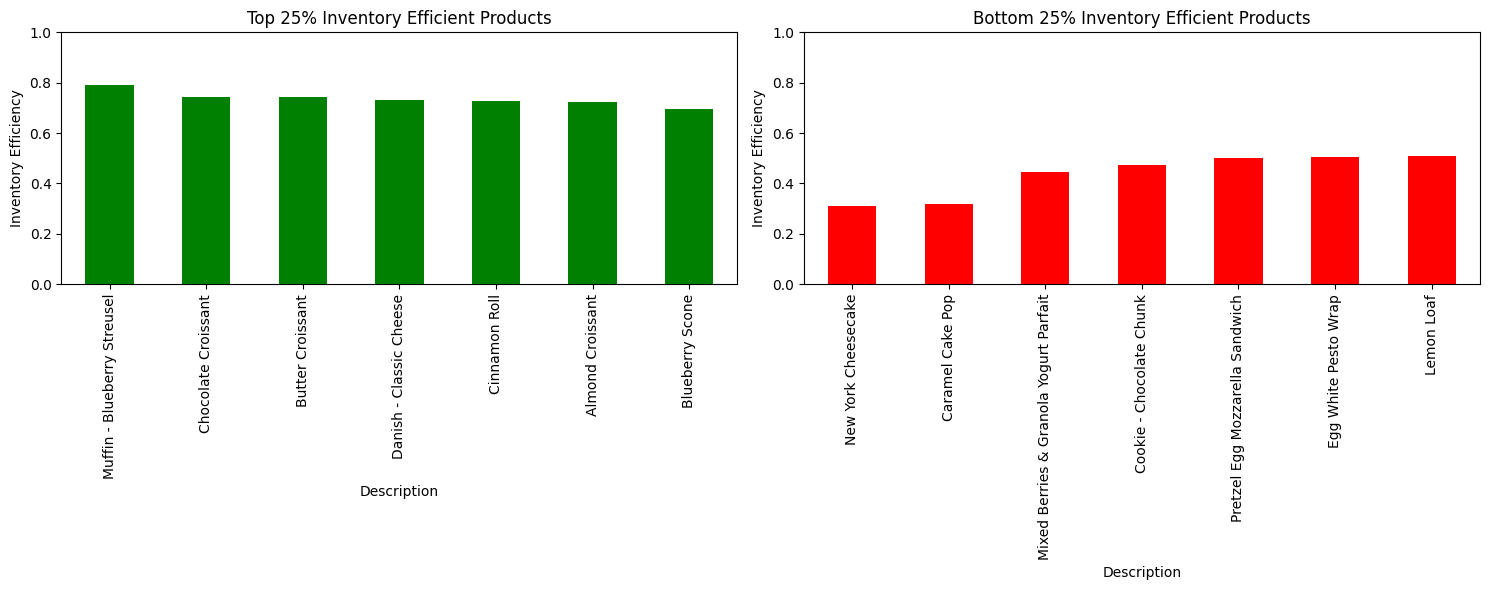

In [ ]:

def inventory_efficiency(sold, received):
    if received == 0 and sold == 0:
        return 0
    elif received == 0 and sold > 0:
        return 1
    else:
        return min(sold / received, 1)

df['InventoryEfficiency'] = df.apply(lambda x: inventory_efficiency(x['SoldQuantity'], x['ReceivedQuantity']), axis=1)

average_efficiency_per_product = df.groupby('Description')['InventoryEfficiency'].mean()

sorted_efficiency = average_efficiency_per_product.sort_values(ascending=False)

cutoff = int(len(sorted_efficiency) * 0.25)
top_25_percent_efficient = sorted_efficiency.head(cutoff)
bottom_25_percent_efficient = sorted_efficiency.tail(cutoff).sort_values(ascending=True)

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
top_25_percent_efficient.plot(kind='bar', color='green')
plt.title('Top 25% Inventory Efficient Products')
plt.ylabel('Inventory Efficiency')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
bottom_25_percent_efficient.plot(kind='bar', color='red')
plt.title('Bottom 25% Inventory Efficient Products')
plt.ylabel('Inventory Efficiency')
plt.ylim(0, 1)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Insights:
1. The top 25% of products have higher inventory costs, indicating efficient stock management and higher demand.
2. The bottom 25% of products show lower inventory costs, possibly due to overstocking or low demand.
3. Efficient inventory management in the top 25% can help reduce waste and increase profitability.

Unpurchased Products (when the store gets rid of them):
            PLU BusinessDate  EndQuantity  StockedOut
39462    830620   2019-06-29          0.0           1
39467    851004   2019-06-29          0.0           0
39468    820602   2019-06-29          0.0           0
39469    810407   2019-06-29          0.0           0
39470    820801   2019-06-29          0.0           0
...         ...          ...          ...         ...
998039  3000159   2020-06-29          0.0           0
998040  3000162   2020-06-29          0.0           1
998041  3000181   2020-06-29          0.0           0
998042  3000207   2020-06-29          0.0           1
998047  3000024   2020-0

<ipython-input-22-3d55805ff2c1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['InventoryCost'] = store_data['EndQuantity'] * average_cost


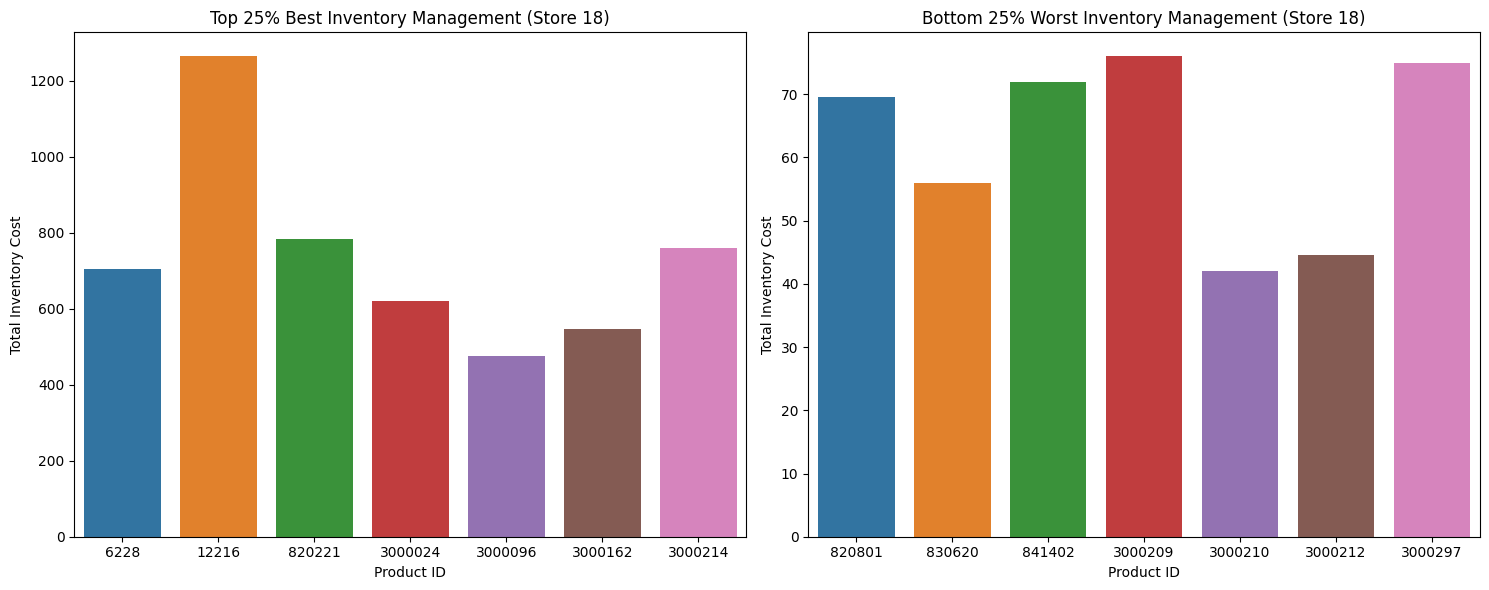

<ipython-input-22-3d55805ff2c1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['InventoryCost'] = store_data['EndQuantity'] * average_cost


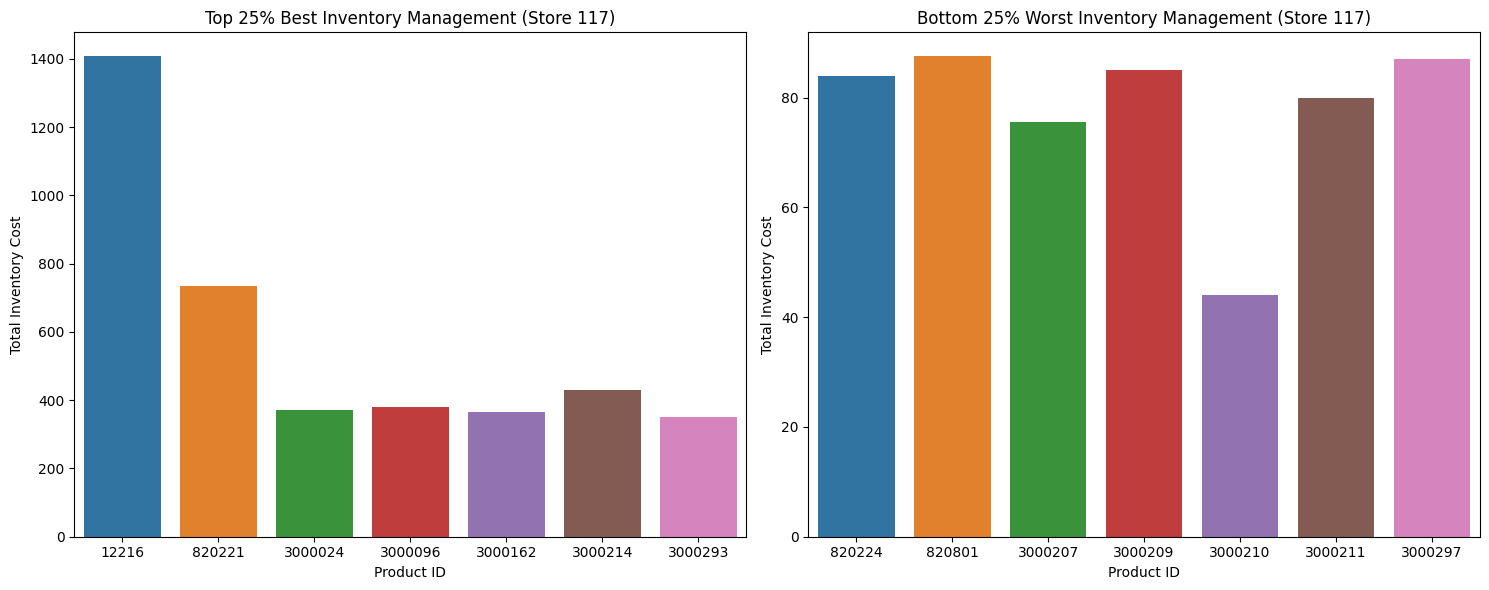

<ipython-input-22-3d55805ff2c1>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_data['InventoryCost'] = store_data['EndQuantity'] * average_cost


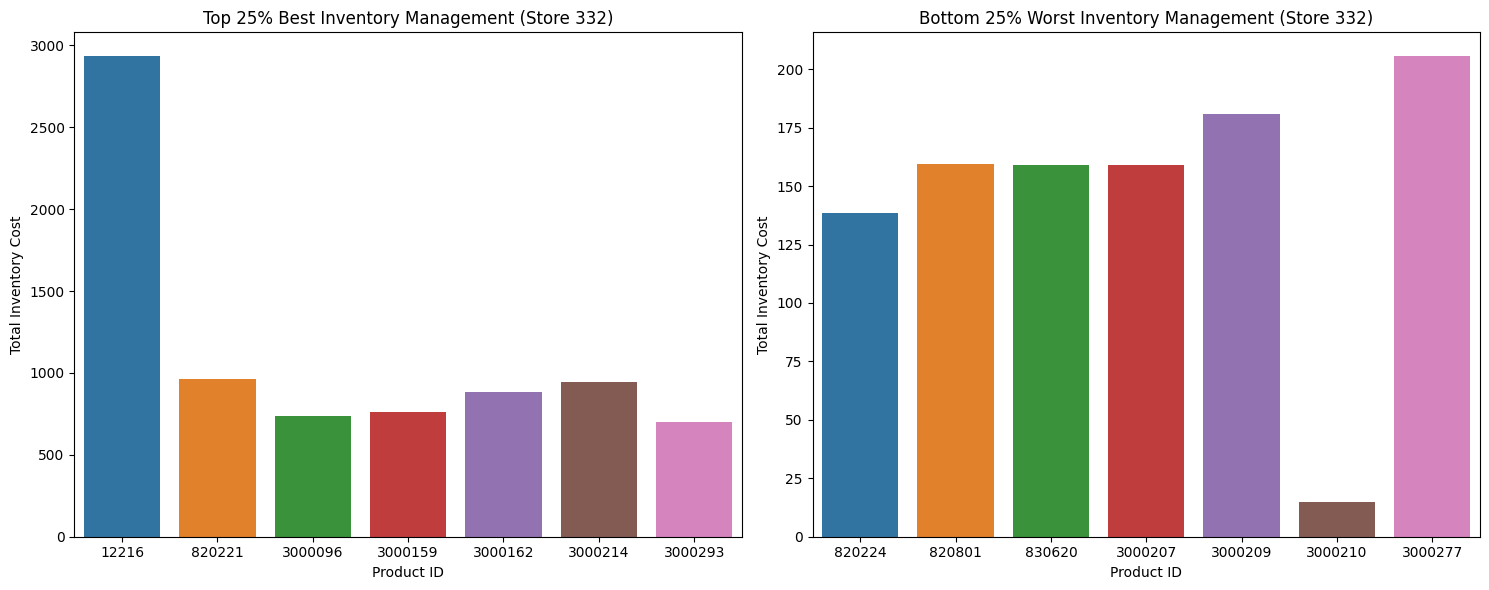

In [ ]:

print("\nInsights:")
print("1. The top 25% of products have higher inventory costs, indicating efficient stock management and higher demand.")
print("2. The bottom 25% of products show lower inventory costs, possibly due to overstocking or low demand.")
print("3. Efficient inventory management in the top 25% can help reduce waste and increase profitability.")

unpurchased_products = filtered_data[filtered_data['EndQuantity'] == 0]
print("\nUnpurchased Products (when the store gets rid of them):")
print(unpurchased_products[['PLU', 'BusinessDate', 'EndQuantity', 'StockedOut']])

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

selected_stores = [18, 117, 332]

average_cost = 0.5

for store_id in selected_stores:
    store_data = coffee_data[coffee_data['StoreID'] == store_id]

    store_data['InventoryCost'] = store_data['EndQuantity'] * average_cost

    top_25_percent_cutoff = int(0.25 * len(store_data['PLU'].unique()))
    bottom_25_percent_cutoff = int(0.75 * len(store_data['PLU'].unique()))

    top_25_percent_inventory = store_data.groupby('PLU')['InventoryCost'].sum().nlargest(top_25_percent_cutoff)
    bottom_25_percent_inventory = store_data.groupby('PLU')['InventoryCost'].sum().nsmallest(top_25_percent_cutoff)

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.barplot(x=top_25_percent_inventory.index, y=top_25_percent_inventory.values, ax=axes[0])
    axes[0].set_title(f'Top 25% Best Inventory Management (Store {store_id})')
    axes[0].set_xlabel('Product ID')
    axes[0].set_ylabel('Total Inventory Cost')

    sns.barplot(x=bottom_25_percent_inventory.index, y=bottom_25_percent_inventory.values, ax=axes[1])
    axes[1].set_title(f'Bottom 25% Worst Inventory Management (Store {store_id})')
    axes[1].set_xlabel('Product ID')
    axes[1].set_ylabel('Total Inventory Cost')

    plt.tight_layout()
    plt.show()

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)


coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])
coffee_data['Weekday'] = coffee_data['BusinessDate'].dt.weekday

coffee_data['4WeekAvgSales'] = coffee_data.groupby(['PLU', 'Weekday'])['SoldQuantity'].transform(lambda x: x.rolling(4, min_periods=1).mean())

coffee_data['IsStockOut'] = coffee_data['StockedOut'] == 1

coffee_data['EstimatedLoss'] = coffee_data.apply(lambda row: row['4WeekAvgSales'] * 0.75 if row['IsStockOut'] else 0, axis=1)

annual_loss_per_product = coffee_data.groupby('PLU')['EstimatedLoss'].sum() * (52 / 4)

annual_loss_table = annual_loss_per_product.reset_index()
annual_loss_table.columns = ['PLU', 'Annual Estimated Loss']
print(annual_loss_table)

        PLU  Annual Estimated Loss
0      6228           1.119544e+04
1     12216           2.090156e+04
2    810407           8.222094e+05
3    810703           9.365574e+05
4    820221           9.435562e+03
5    820224           1.071616e+06
6    820602           7.020439e+05
7    820801           8.137301e+05
8    820902           1.157221e+06
9    830620           4.925627e+05
10   841402           8.902814e+05
11   851004           9.412812e+05
12  3000024           1.693608e+05
13  3000096           1.096534e+05
14  3000159           2.966186e+05
15  3000162           2.046752e+05
16  3000166           1.747874e+05
17  3000181           1.567727e+05
18  3000207           9.732905e+05
19  3000209           6.585467e+05
20  3000210           3.470902e+05
21  3000211           1.374505e+06
22  3000212           6.270989e+05
23  3000214           3.654479e+05
24  3000227           3.200267e+05
25  3000277           1.057972e+05
26  3000278           2.319639e+05
27  3000281         

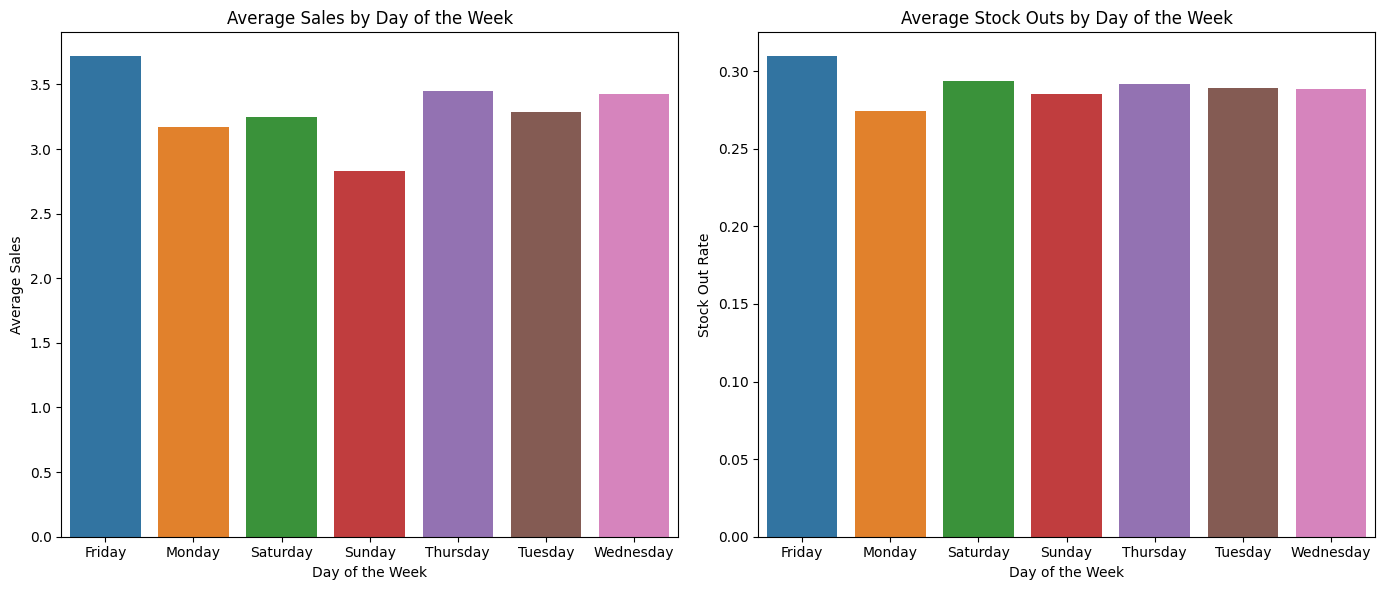

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
data = pd.read_csv(file_path)

data['BusinessDate'] = pd.to_datetime(data['BusinessDate'])
data['DayOfWeek'] = data['BusinessDate'].dt.day_name()

weekly_sales = data.groupby('DayOfWeek')['SoldQuantity'].mean()
weekly_stockouts = data.groupby('DayOfWeek')['StockedOut'].mean()  # Assuming 'StockedOut' is a binary indicator

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=weekly_sales.index, y=weekly_sales.values)
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.barplot(x=weekly_stockouts.index, y=weekly_stockouts.values)
plt.title('Average Stock Outs by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Stock Out Rate')

plt.tight_layout()
plt.show()

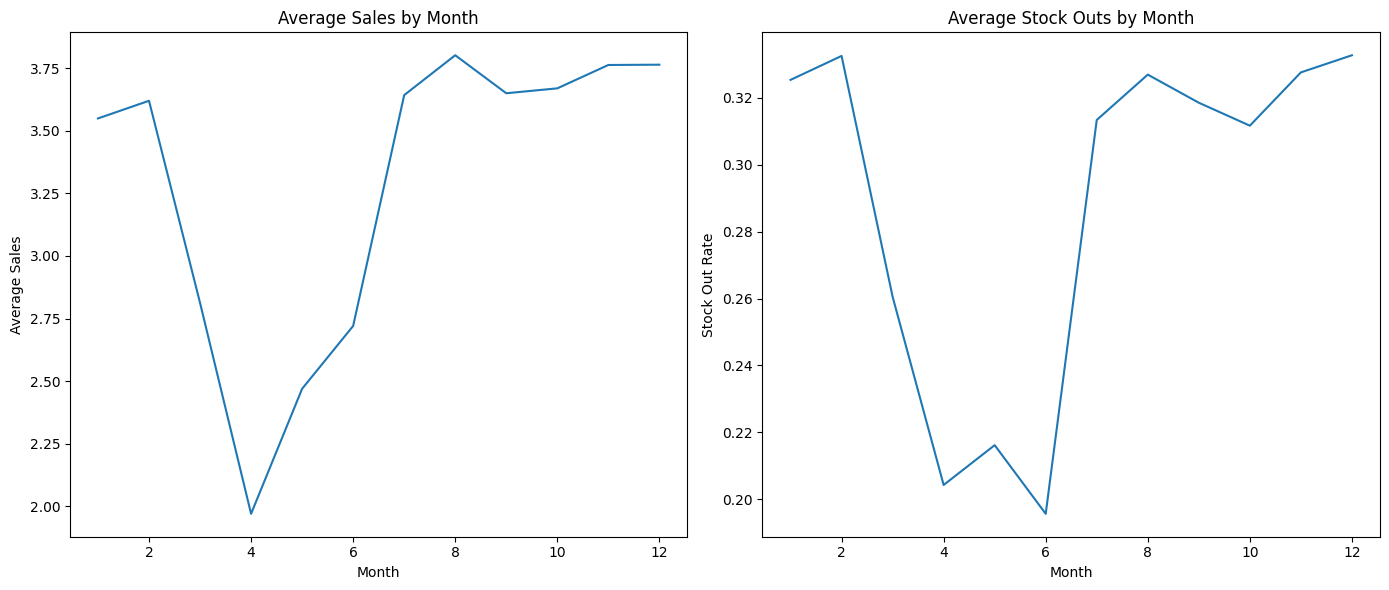

In [ ]:
data['Month'] = data['BusinessDate'].dt.month

monthly_sales = data.groupby('Month')['SoldQuantity'].mean()
monthly_stockouts = data.groupby('Month')['StockedOut'].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.lineplot(x=monthly_stockouts.index, y=monthly_stockouts.values)
plt.title('Average Stock Outs by Month')
plt.xlabel('Month')
plt.ylabel('Stock Out Rate')

plt.tight_layout()
plt.show()

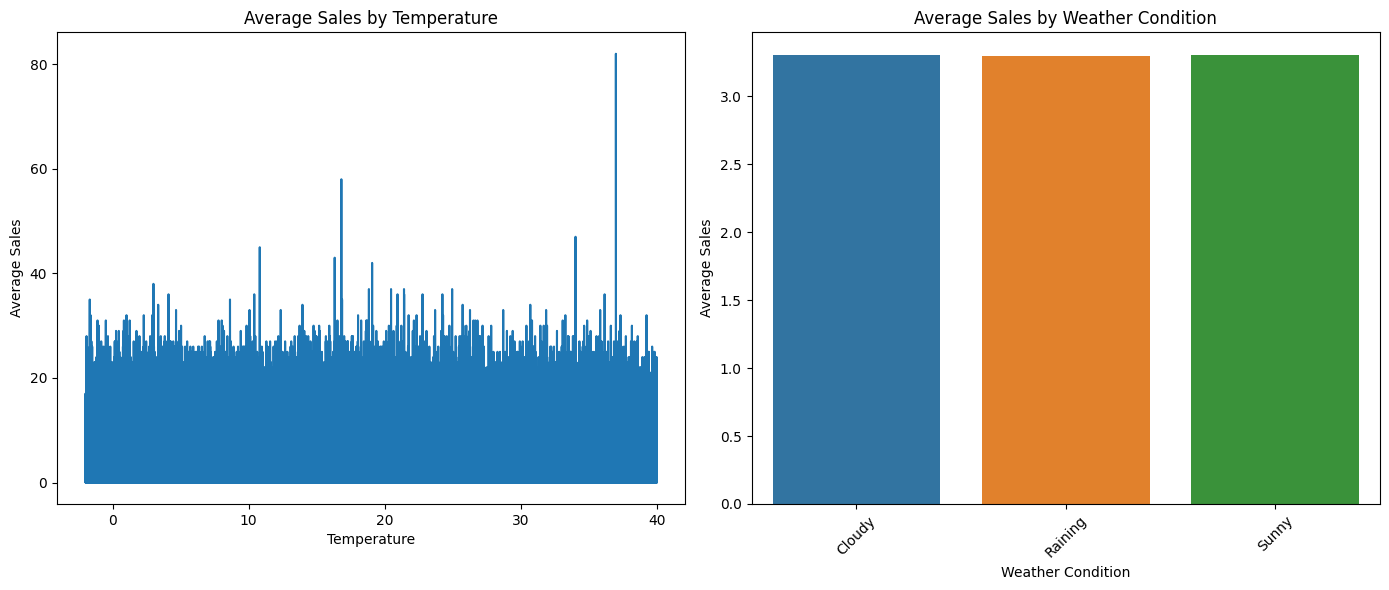

In [ ]:

temp_sales = data.groupby('Temperature')['SoldQuantity'].mean()
weather_sales = data.groupby('WeatherCondition')['SoldQuantity'].mean()

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=temp_sales.index, y=temp_sales.values)
plt.title('Average Sales by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.barplot(x=weather_sales.index, y=weather_sales.values)
plt.title('Average Sales by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_stores_data = pd.read_csv(file_path)

grouped_data = coffee_stores_data.groupby(['DriveThru', 'Description']).agg({'SoldQuantity': 'sum'}).reset_index()

drive_thru_data = grouped_data[grouped_data['DriveThru'] == 'Yes']
no_drive_thru_data = grouped_data[grouped_data['DriveThru'] == 'No']

comparison_data = pd.merge(drive_thru_data, no_drive_thru_data, on='Description', suffixes=('_DriveThru', '_NoDriveThru'))

comparison_data['SalesDifference'] = comparison_data['SoldQuantity_DriveThru'] - comparison_data['SoldQuantity_NoDriveThru']

comparison_data.sort_values(by='SalesDifference', ascending=False, inplace=True)

comparison_data.head()

DriveThru_DriveThru                  Description  SoldQuantity_DriveThru  \
20                 Yes  Muffin - Blueberry Streusel                333008.0   
16                 Yes        Jalapeno Cheese Bagel                271338.0   
3                  Yes             Butter Croissant                271722.0   
24                 Yes                  Plain Bagel                252582.0   
8                  Yes    Coffee Cake with Streusel                221272.0   

   DriveThru_NoDriveThru  SoldQuantity_NoDriveThru  SalesDifference  
20                    No                    4791.0         328217.0  
16                    No                    8938.0         262400.0  
3                     No                   10010.0         261712.0  
24                    No                   10389.0         242193.0  
8                     No                    6148.0         215124.0

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_stores_data = pd.read_csv(file_path)

selected_stores_data = coffee_stores_data[coffee_stores_data['StoreID'].isin([18, 117, 332])]

grouped_store_data = selected_stores_data.groupby(['StoreID', 'DriveThru', 'Description']).agg({'SoldQuantity': 'sum'}).reset_index()

def prepare_comparison_data(store_id, grouped_data):
    store_data = grouped_data[grouped_data['StoreID'] == store_id]
    comparison = pd.merge(store_data[store_data['DriveThru'] == 'Yes'], store_data[store_data['DriveThru'] == 'No'], on='Description', suffixes=(f'_{store_id}_DriveThru', f'_{store_id}_NoDriveThru'))
    comparison[f'SalesDifference_{store_id}'] = comparison[f'SoldQuantity_{store_id}_DriveThru'] - comparison[f'SoldQuantity_{store_id}_NoDriveThru']
    return comparison.sort_values(by=f'SalesDifference_{store_id}', ascending=False)

comparison_18 = prepare_comparison_data(18, grouped_store_data).head()
comparison_117 = prepare_comparison_data(117, grouped_store_data).head()
comparison_332 = prepare_comparison_data(332, grouped_store_data).head()

print("Store 18 Sales Difference Comparison:")
display(comparison_18)
print("\nStore 117 Sales Difference Comparison:")
display(comparison_117)
print("\nStore 332 Sales Difference Comparison:")
display(comparison_332)

Store 18 Sales Difference Comparison:


StoreID_18_DriveThru DriveThru_18_DriveThru          Description  \
24                    18                    Yes          Plain Bagel   
6                     18                    Yes  Chocolate Croissant   
3                     18                    Yes     Butter Croissant   
1                     18                    Yes      Blueberry Scone   
0                     18                    Yes     Almond Croissant   

    SoldQuantity_18_DriveThru  StoreID_18_NoDriveThru  \
24                     1799.0                      18   
6                      1727.0                      18   
3                      1685.0                      18   
1                      1485.0                      18   
0                      1439.0                      18   

   DriveThru_18_NoDriveThru  SoldQuantity_18_NoDriveThru  SalesDifference_18  
24                       No                         71.0              1728.0  
6                        No                         43.0              1684.0  
3                        No                        111.0              1574.0  
1                        No                         77.0              1408.0  
0                        No                        120.0              1319.0


Store 117 Sales Difference Comparison:


StoreID_117_DriveThru DriveThru_117_DriveThru  \
20                    117                     Yes   
3                     117                     Yes   
16                    117                     Yes   
24                    117                     Yes   
1                     117                     Yes   

                    Description  SoldQuantity_117_DriveThru  \
20  Muffin - Blueberry Streusel                      1589.0   
3              Butter Croissant                      1512.0   
16        Jalapeno Cheese Bagel                      1254.0   
24                  Plain Bagel                      1188.0   
1               Blueberry Scone                      1033.0   

    StoreID_117_NoDriveThru DriveThru_117_NoDriveThru  \
20                      117                        No   
3                       117                        No   
16                      117                        No   
24                      117                        No   
1                       117                        No   

    SoldQuantity_117_NoDriveThru  SalesDifference_117  
20                          67.0               1522.0  
3                           94.0               1418.0  
16                         124.0               1130.0  
24                         133.0               1055.0  
1                          175.0                858.0


Store 332 Sales Difference Comparison:


StoreID_332_DriveThru DriveThru_332_DriveThru  \
20                    332                     Yes   
16                    332                     Yes   
14                    332                     Yes   
8                     332                     Yes   
3                     332                     Yes   

                    Description  SoldQuantity_332_DriveThru  \
20  Muffin - Blueberry Streusel                      4032.0   
16        Jalapeno Cheese Bagel                      3209.0   
14             Everything Bagel                      3078.0   
8     Coffee Cake with Streusel                      2858.0   
3              Butter Croissant                      2805.0   

    StoreID_332_NoDriveThru DriveThru_332_NoDriveThru  \
20                      332                        No   
16                      332                        No   
14                      332                        No   
8                       332                        No   
3                       332                        No   

    SoldQuantity_332_NoDriveThru  SalesDifference_332  
20                           2.0               4030.0  
16                          22.0               3187.0  
14                          22.0               3056.0  
8                            7.0               2851.0  
3                           18.0               2787.0

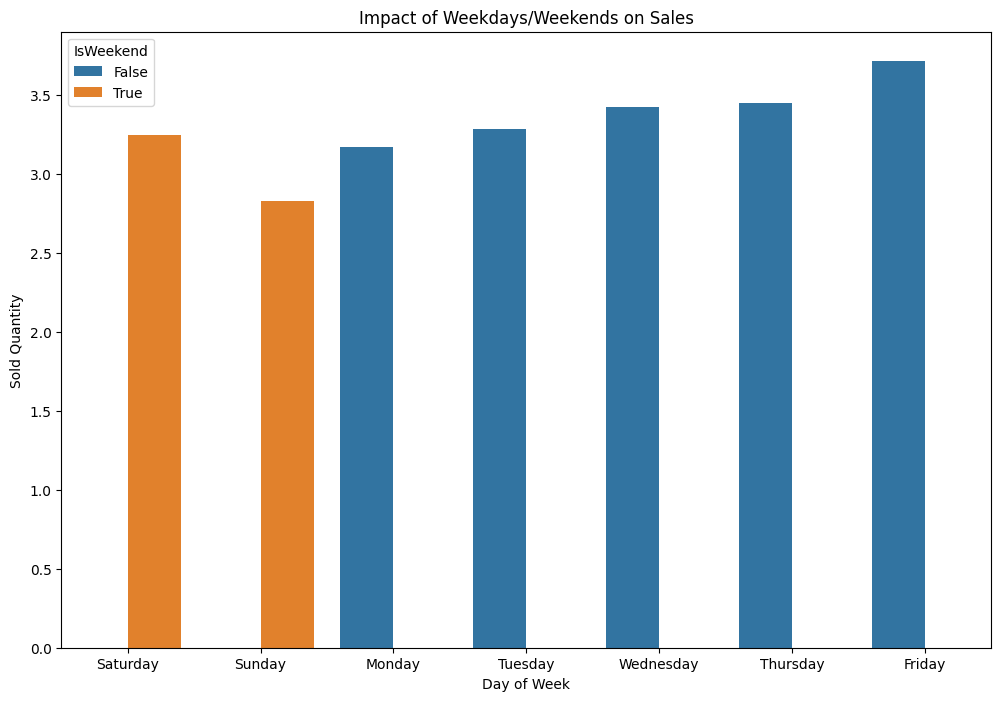

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])

coffee_data['DayOfWeek'] = coffee_data['BusinessDate'].dt.day_name()
coffee_data['IsWeekend'] = coffee_data['BusinessDate'].dt.weekday >= 5

plt.figure(figsize=(12, 8))
sns.barplot(x='DayOfWeek', y='SoldQuantity', data=coffee_data, hue='IsWeekend', errorbar=None)
plt.title('Impact of Weekdays/Weekends on Sales')
plt.xlabel('Day of Week')
plt.ylabel('Sold Quantity')
plt.show()

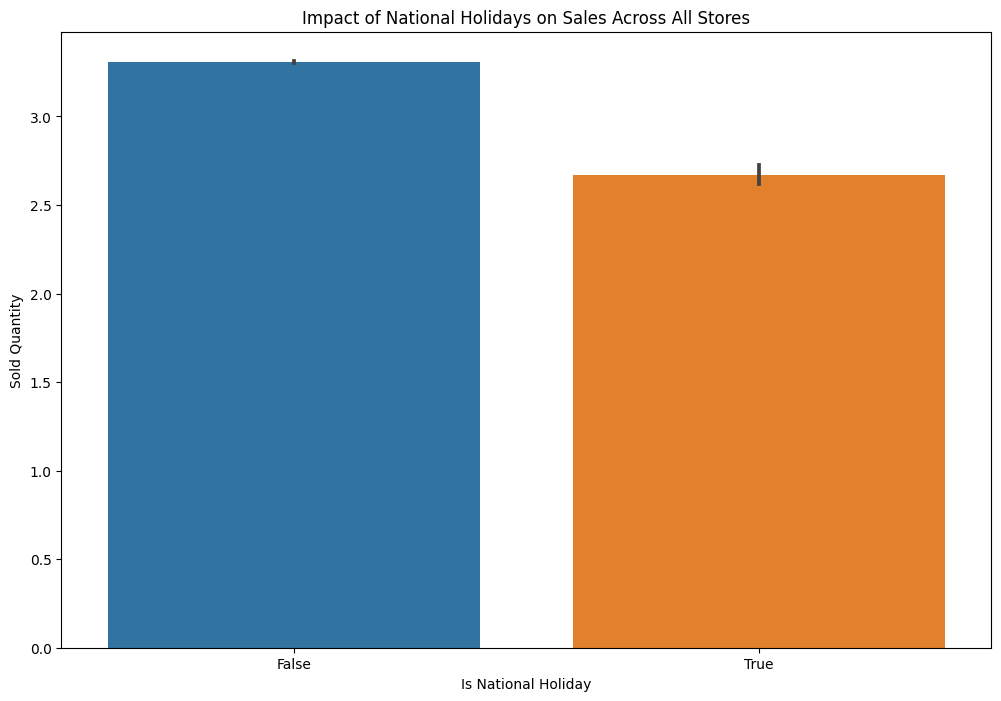

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])

national_holidays = ['2019-01-01', '2019-07-04', '2019-12-25', '2019-11-28', '2019-05-27']

national_holidays = pd.to_datetime(national_holidays)
coffee_data['IsNationalHoliday'] = coffee_data['BusinessDate'].isin(national_holidays)

plt.figure(figsize=(12, 8))
sns.barplot(x='IsNationalHoliday', y='SoldQuantity', data=coffee_data)
plt.title('Impact of National Holidays on Sales Across All Stores')
plt.xlabel('Is National Holiday')
plt.ylabel('Sold Quantity')
plt.show()

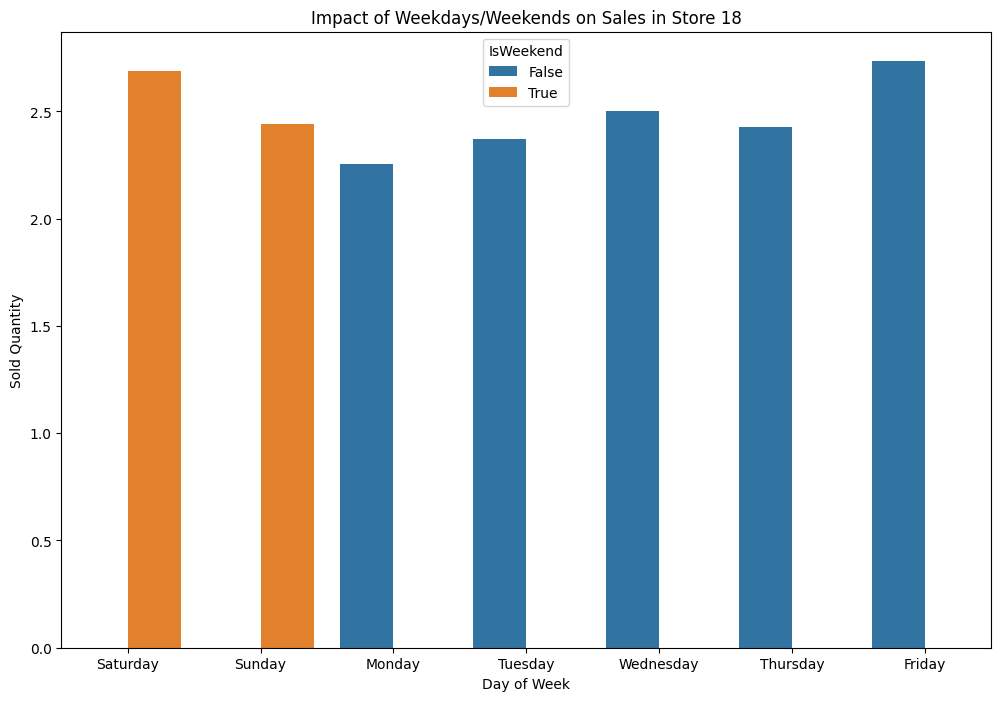

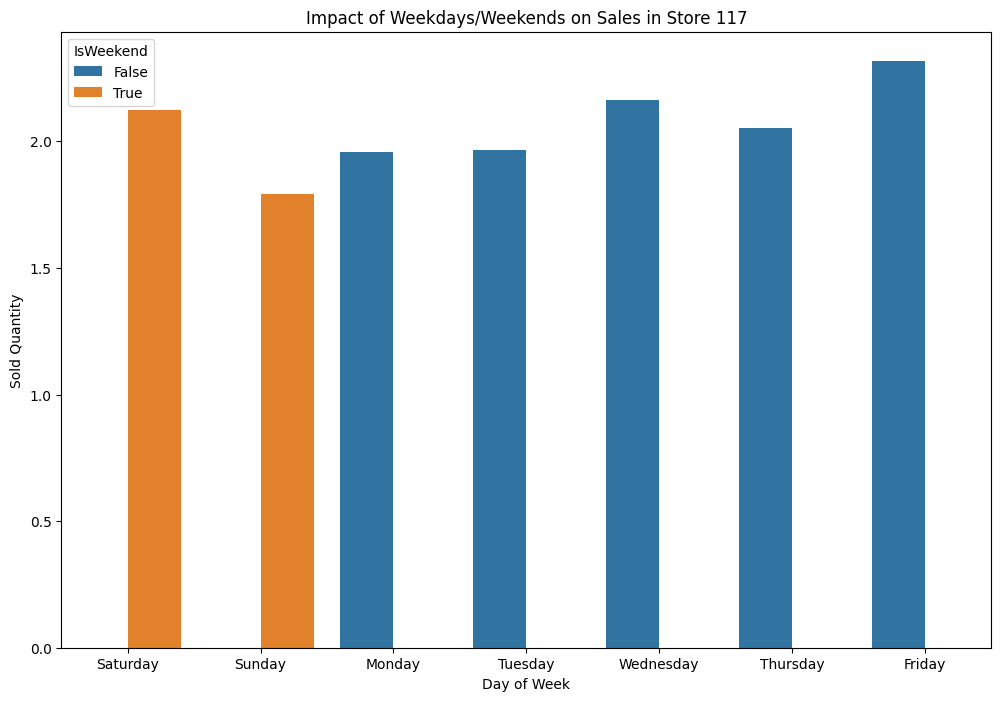

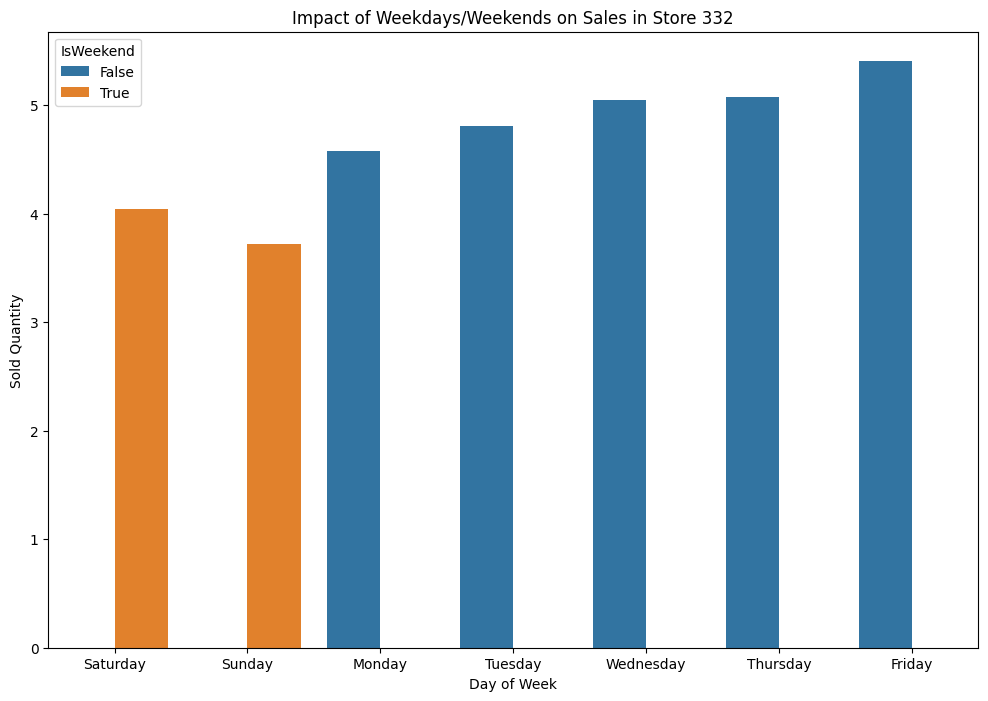

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])

coffee_data['DayOfWeek'] = coffee_data['BusinessDate'].dt.day_name()
coffee_data['IsWeekend'] = coffee_data['BusinessDate'].dt.weekday >= 5

filtered_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

for store_id in [18, 117, 332]:
    store_data = filtered_data[filtered_data['StoreID'] == store_id]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='DayOfWeek', y='SoldQuantity', data=store_data, hue='IsWeekend', errorbar=None)
    plt.title(f'Impact of Weekdays/Weekends on Sales in Store {store_id}')
    plt.xlabel('Day of Week')
    plt.ylabel('Sold Quantity')
    plt.show()

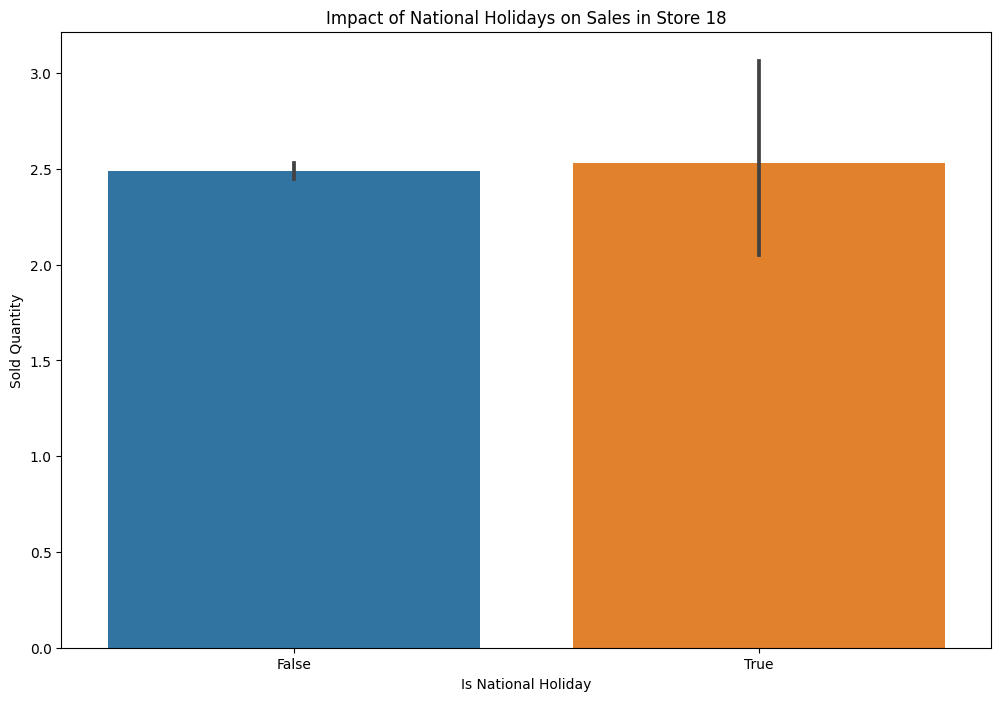

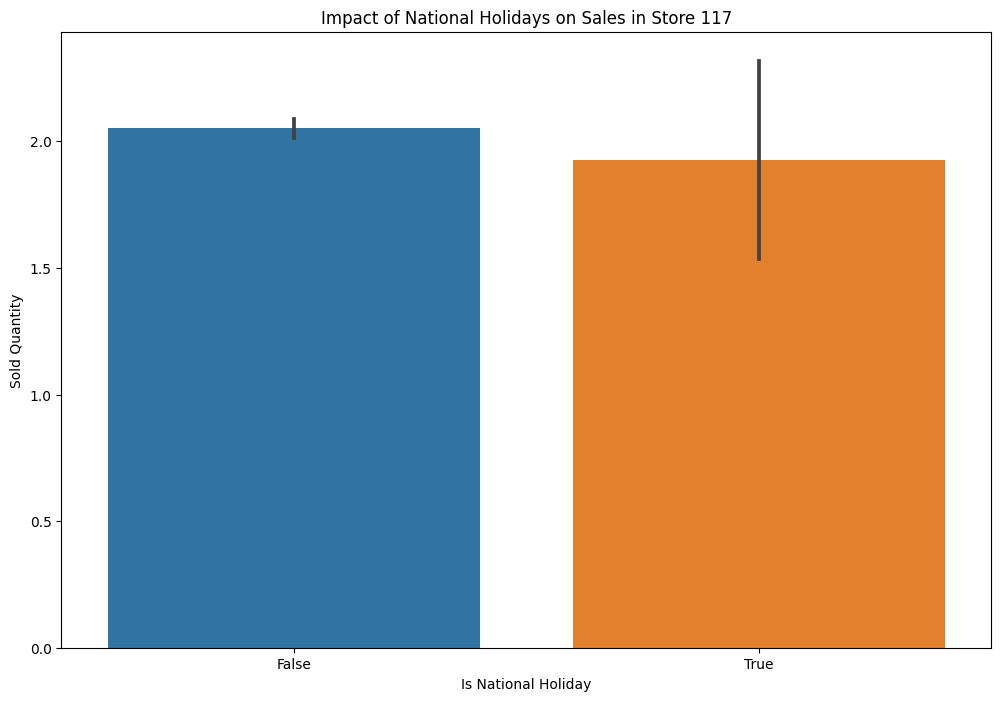

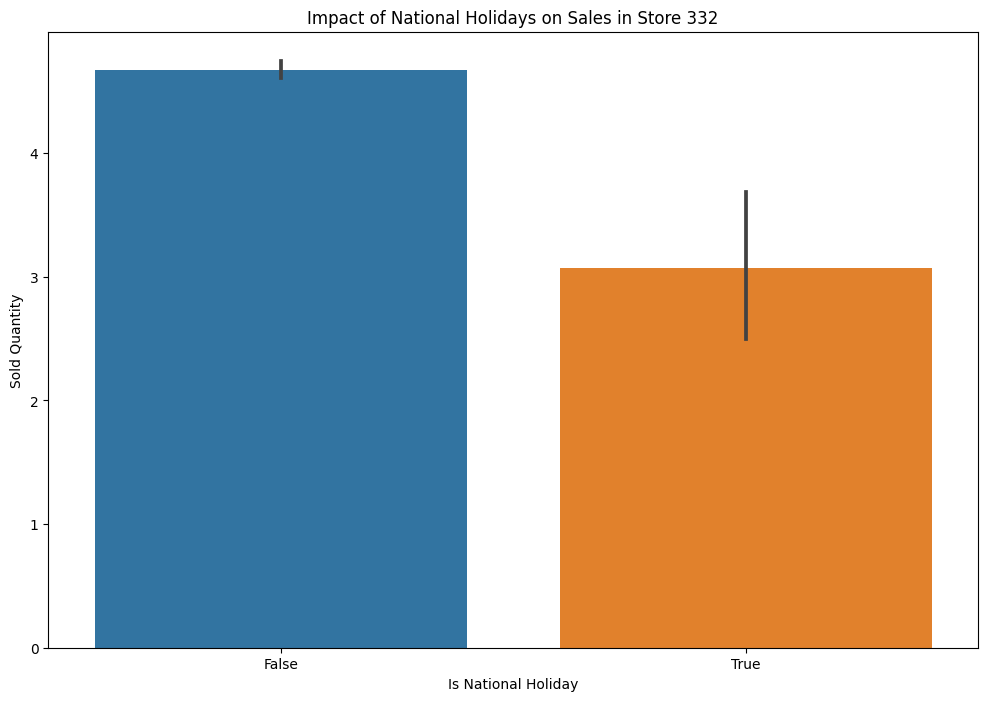

In [ ]:
file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

coffee_data['BusinessDate'] = pd.to_datetime(coffee_data['BusinessDate'])

national_holidays = ['2019-01-01', '2019-07-04', '2019-12-25', '2019-11-28', '2019-05-27']

national_holidays = pd.to_datetime(national_holidays)
coffee_data['IsNationalHoliday'] = coffee_data['BusinessDate'].isin(national_holidays)

filtered_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

for store_id in [18, 117, 332]:
    store_specific_data = filtered_data[filtered_data['StoreID'] == store_id]
    plt.figure(figsize=(12, 8))
    sns.barplot(x='IsNationalHoliday', y='SoldQuantity', data=store_specific_data)
    plt.title(f'Impact of National Holidays on Sales in Store {store_id}')
    plt.xlabel('Is National Holiday')
    plt.ylabel('Sold Quantity')
    plt.show()

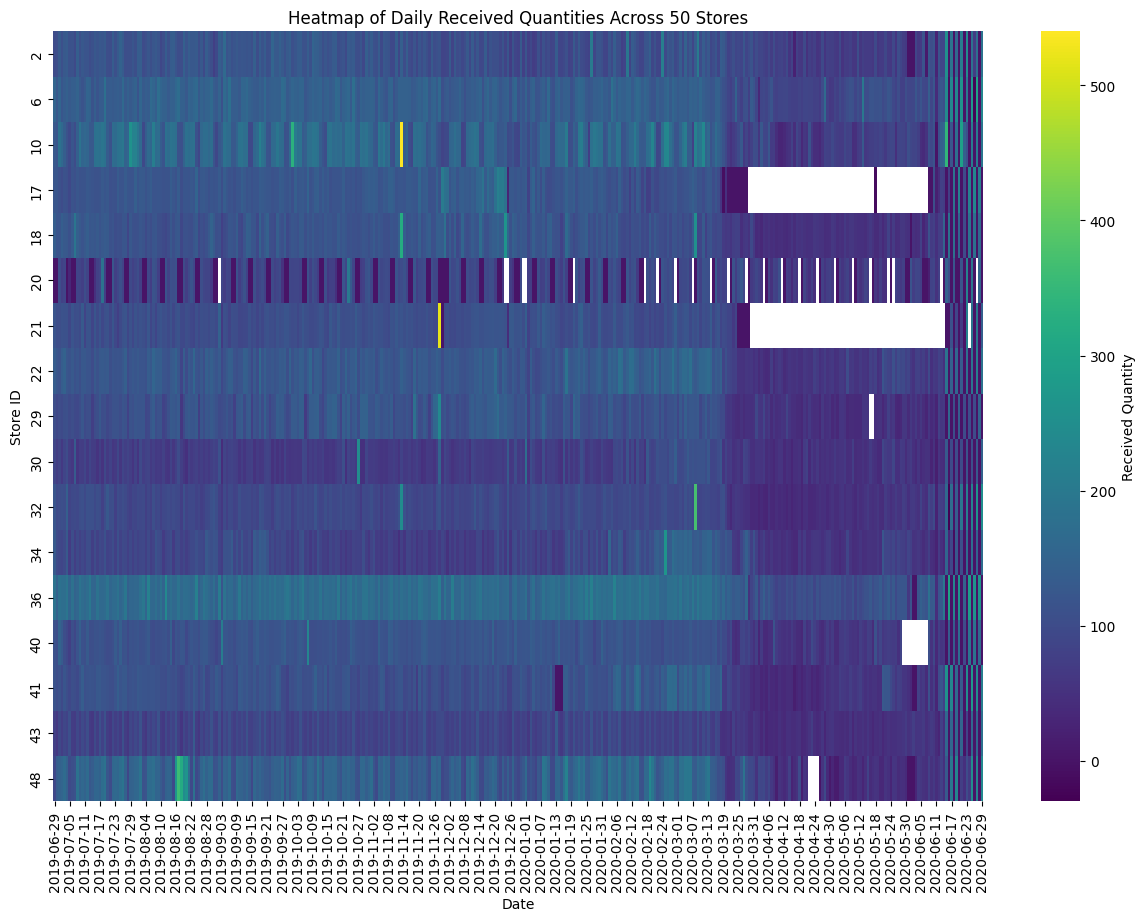

(341.7647058823529,
 count     17.000000
 mean     341.764706
 std       36.637633
 min      246.000000
 25%      354.000000
 50%      358.000000
 75%      360.000000
 max      361.000000
 dtype: float64)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


coffee_stores_data = pd.read_csv('/content/Coffee_Stores_Data.csv')

filtered_data = coffee_stores_data[coffee_stores_data['StoreID'].isin(range(1, 51))]
filtered_data = coffee_stores_data[coffee_stores_data['StoreID'].isin(range(1, 51))]

grouped_data_50 = filtered_data.groupby(['StoreID', 'BusinessDate']).agg({'ReceivedQuantity':'sum'}).reset_index()
pivot_data_50 = grouped_data_50.pivot(index='StoreID', columns='BusinessDate', values='ReceivedQuantity')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot_data_50, cmap='viridis', cbar_kws={'label': 'Received Quantity'})
plt.title('Heatmap of Daily Received Quantities Across 50 Stores')
plt.xlabel('Date')
plt.ylabel('Store ID')
plt.show()

restocking_days_50 = (pivot_data_50 > 0).sum(axis=1)
average_restocking_frequency_50 = restocking_days_50.mean()

average_restocking_frequency_50, restocking_days_50.describe()

In [ ]:
'---------------------------------------------------------------------------SECTION-2_-------------------------------------------------------------------------------------'

'---------------------------------------------------------------------------SECTION-2_-------------------------------------------------------------------------------------'

In [ ]:
!pip install holidays

In [ ]:
import pandas as pd
import holidays


data = pd.read_csv('/content/Coffee_Stores_Data.csv')


data['BusinessDate'] = pd.to_datetime(data['BusinessDate'])


def is_holiday(date):
    us_holidays = holidays.US(years=[date.year])
    return date in us_holidays

data['IsHoliday'] = data['BusinessDate'].apply(is_holiday)

print(data[['BusinessDate', 'IsHoliday']].head(1))

  BusinessDate  IsHoliday
0   2019-06-29      False


<ipython-input-16-8ae87756e9b7>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BusinessDate'] = pd.to_datetime(filtered_data['BusinessDate'])
<ipython-input-16-8ae87756e9b7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['DayOfWeek'] = filtered_data['BusinessDate'].dt.dayofweek
<ipython-input-16-8ae87756e9b7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

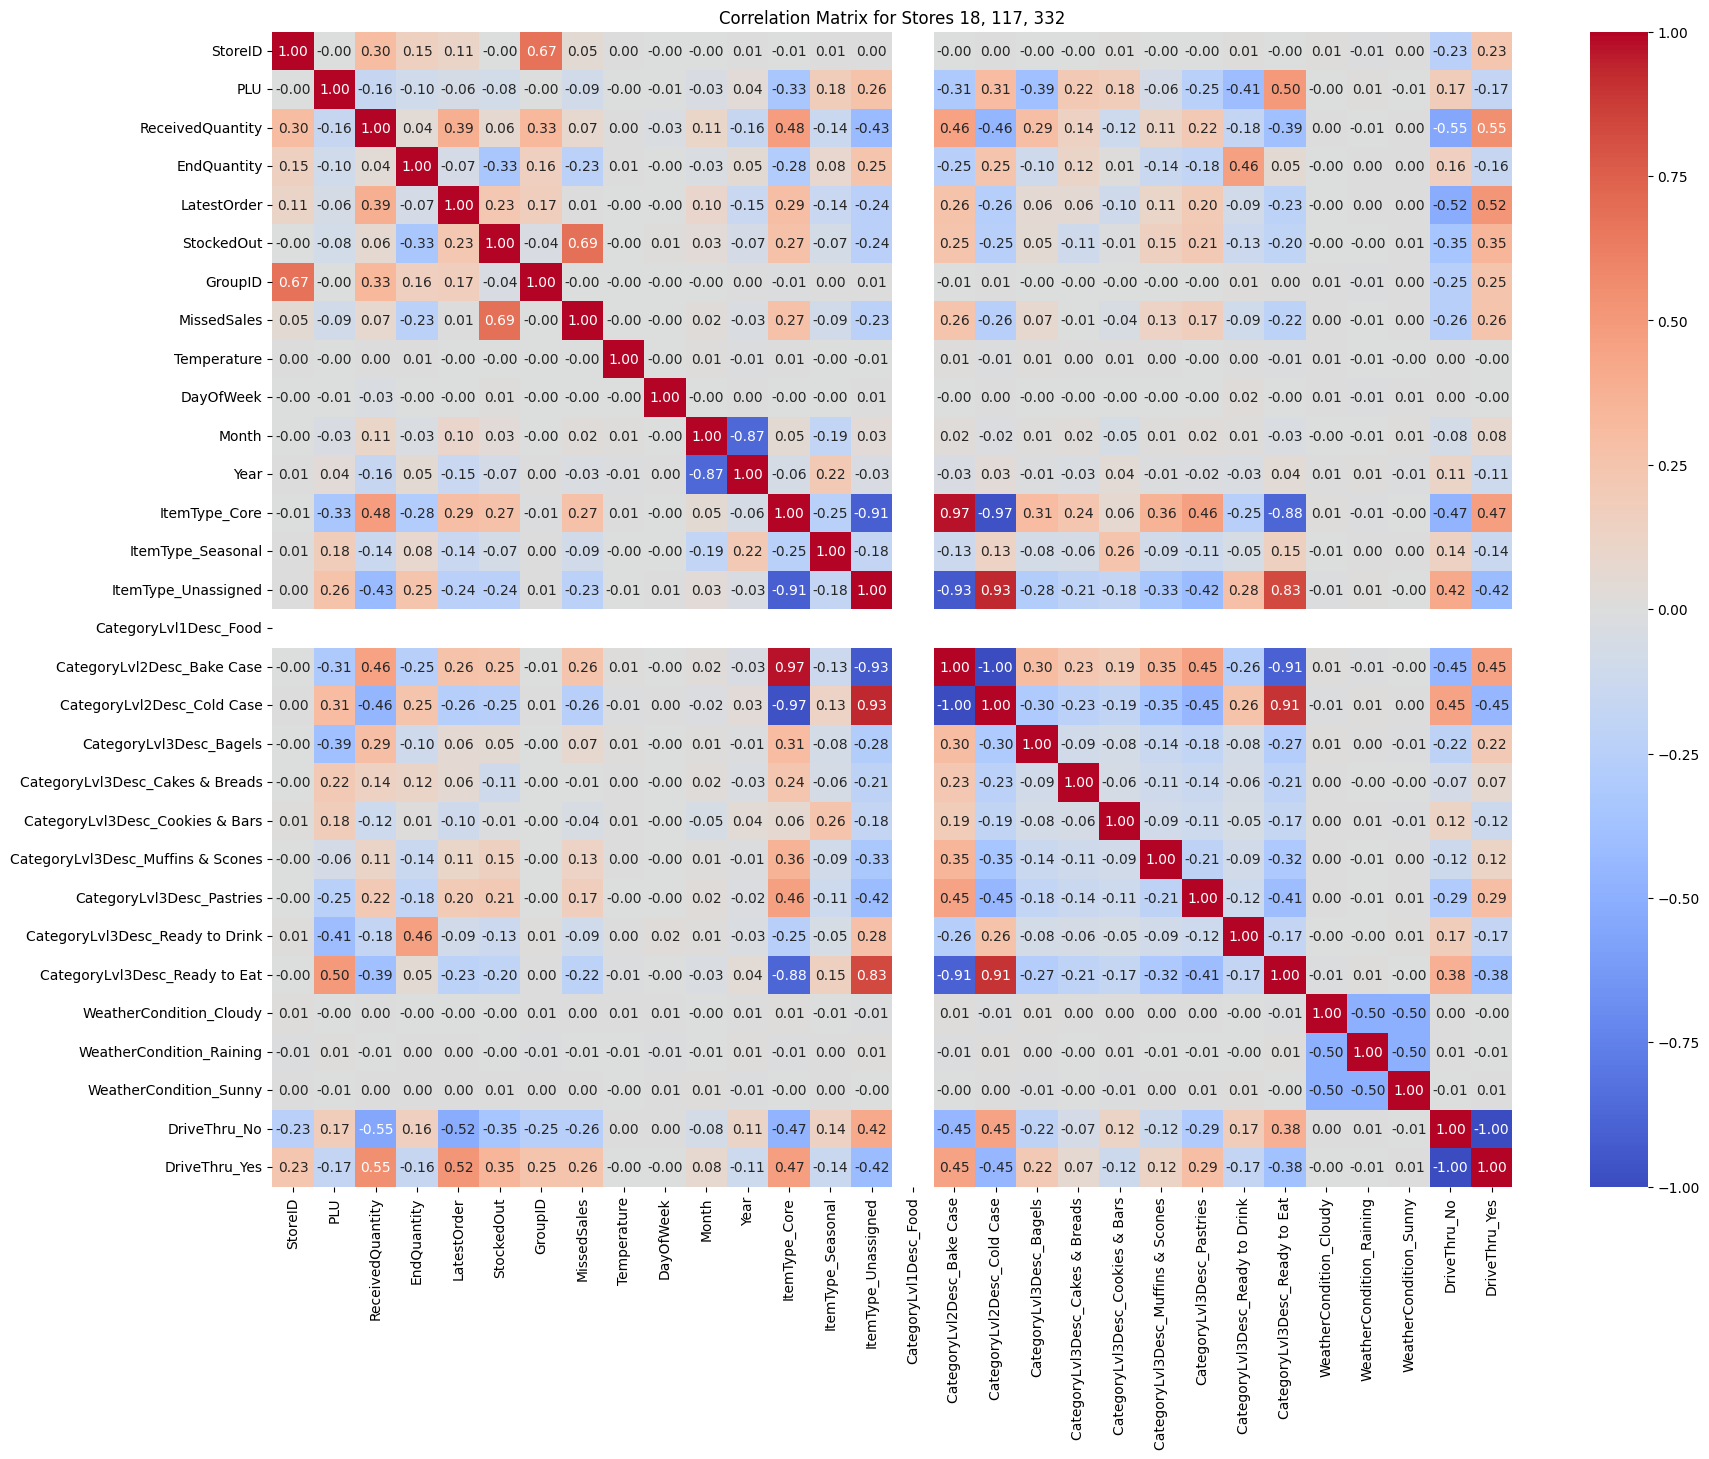

Dropping 'ItemType_Unassigned' because it is highly correlated with 'ItemType_Core'
Dropping 'CategoryLvl2Desc_Bake Case' because it is highly correlated with 'ItemType_Unassigned'
Dropping 'CategoryLvl2Desc_Cold Case' because it is highly correlated with 'CategoryLvl2Desc_Bake Case'
Dropping 'CategoryLvl3Desc_Ready to Eat' because it is highly correlated with 'CategoryLvl2Desc_Cold Case'
Dropping 'DriveThru_Yes' because it is highly correlated with 'DriveThru_No'


In [ ]:

file_path = '/content/Coffee_Stores_Data.csv'
data = pd.read_csv(file_path)

stores = [18, 117, 332]
filtered_data = data[data['StoreID'].isin(stores)]

filtered_data['BusinessDate'] = pd.to_datetime(filtered_data['BusinessDate'])
filtered_data['DayOfWeek'] = filtered_data['BusinessDate'].dt.dayofweek
filtered_data['Month'] = filtered_data['BusinessDate'].dt.month
filtered_data['Year'] = filtered_data['BusinessDate'].dt.year

us_holidays = holidays.US(years=filtered_data['Year'].unique().tolist())
filtered_data['IsHoliday'] = filtered_data['BusinessDate'].apply(lambda x: x in us_holidays)

categorical_features = ['ItemType', 'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc', 'WeatherCondition', 'DriveThru']
filtered_data = pd.get_dummies(filtered_data, columns=categorical_features)

filtered_data = filtered_data.dropna()

numeric_filtered_data = filtered_data.select_dtypes(include=[np.number])
numeric_filtered_data = numeric_filtered_data.drop(['SoldQuantity'], axis=1)

corr_filtered = numeric_filtered_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_filtered, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Stores 18, 117, 332')
plt.show()

threshold = 0.9
correlated_pairs = {}
for i in range(len(corr_filtered.columns)):
    for j in range(i):
        if abs(corr_filtered.iloc[i, j]) > threshold:
            colname = corr_filtered.columns[i]
            correlated_pairs[colname] = corr_filtered.columns[j]

# Dropping highly correlated features and showing the reasons
for col, correlated_with in correlated_pairs.items():
    print(f"Dropping '{col}' because it is highly correlated with '{correlated_with}'")
    filtered_data_reduced = filtered_data.drop(col, axis=1)

Index(['StoreID', 'BusinessDate', 'PLU', 'Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales', 'Temperature',
       'WeatherCondition', 'DriveThru'],
      dtype='object')
Mean Squared Error: 2.7583423566117835


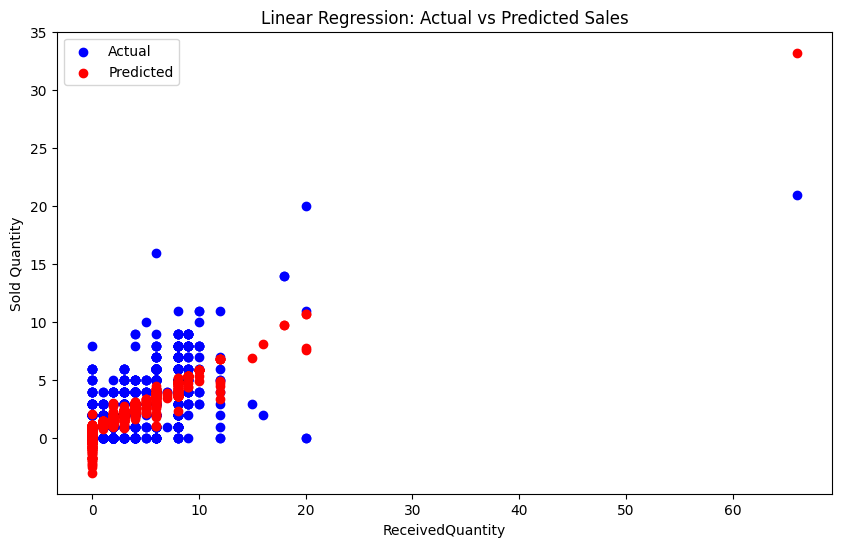

In [ ]:
from sklearn.linear_model import LinearRegression

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_store_data = coffee_data[coffee_data['StoreID'].isin([18])]

print(specified_store_data.columns)

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

if set(features).issubset(specified_store_data.columns):
    X = specified_store_data[features]
    y = specified_store_data[target_variable]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[features[0]], y_test, color='blue', label='Actual')
    plt.scatter(X_test[features[0]], y_pred, color='red', label='Predicted')
    plt.title('Linear Regression: Actual vs Predicted Sales')
    plt.xlabel(features[0])
    plt.ylabel('Sold Quantity')
    plt.legend()
    plt.show()

else:
    print("One or more specified features are not present in the dataset.")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = '/content/Coffee_Stores_Data.csv'
data = pd.read_csv(file_path)

stores = [18, 117, 332]
filtered_data = data[data['StoreID'].isin(stores)]

filtered_data['BusinessDate'] = pd.to_datetime(filtered_data['BusinessDate'])
filtered_data['Year'] = filtered_data['BusinessDate'].dt.year
filtered_data['Month'] = filtered_data['BusinessDate'].dt.month
filtered_data['Day'] = filtered_data['BusinessDate'].dt.day

filtered_data = filtered_data.drop(['BusinessDate', 'StoreID', 'PLU', 'Description'], axis=1)

filtered_data = pd.get_dummies(filtered_data)

X = filtered_data.drop('SoldQuantity', axis=1)
y = filtered_data['SoldQuantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Machine": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}


for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} (Imputed) - RMSE: {rmse}, R-squared: {r2}")

<ipython-input-22-adb23dcaef82>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['BusinessDate'] = pd.to_datetime(filtered_data['BusinessDate'])
<ipython-input-22-adb23dcaef82>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year'] = filtered_data['BusinessDate'].dt.year
<ipython-input-22-adb23dcaef82>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Random Forest (Imputed) - RMSE: 0.9784439480941858, R-squared: 0.8825665282446924
Gradient Boosting Machine (Imputed) - RMSE: 0.9842871650175089, R-squared: 0.8811597267732032
XGBoost (Imputed) - RMSE: 0.9804663973560708, R-squared: 0.8820805551871367


Epoch 1/50
777/777 [==============================] - 8s 6ms/step - loss: 0.0157 - val_loss: 0.0106
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0096 - val_loss: 0.0077
Epoch 3/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 4/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 5/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0074
Epoch 6/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0075
Epoch 7/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.0074
Epoch 8/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 9/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 10/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0085 - val_loss: 0.0074

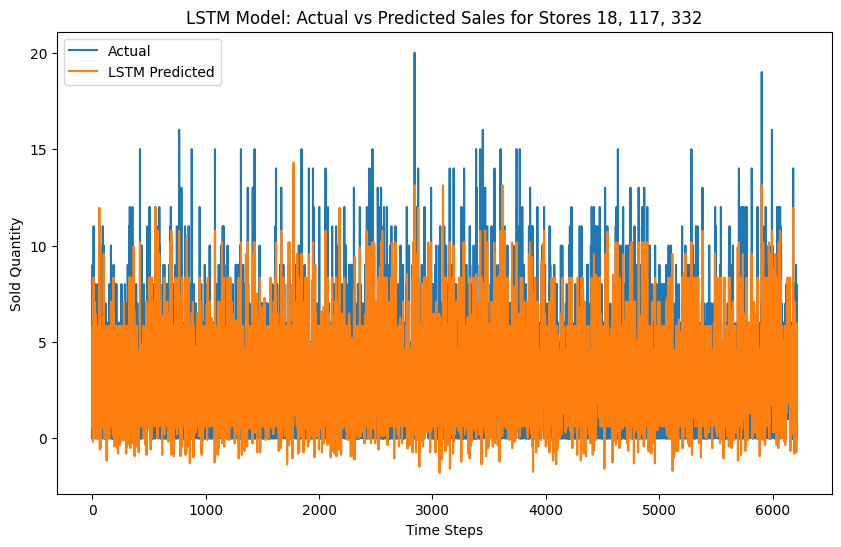

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1, len(features))
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_lstm = model.predict(X_test)

# Inverse transform the predictions to the original scale
y_pred_lstm = scaler.inverse_transform(y_pred_lstm.reshape(-1, 1)).reshape(-1)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Predicted')
plt.title('LSTM Model: Actual vs Predicted Sales for Stores 18, 117, 332')
plt.xlabel('Time Steps')
plt.ylabel('Sold Quantity')
plt.legend()
plt.show()

Epoch 1/50
777/777 [==============================] - 4s 3ms/step - loss: 0.0092 - val_loss: 0.0067
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 3/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.0066
Epoch 4/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 5/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 6/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0069
Epoch 7/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 8/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 9/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 10/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0064

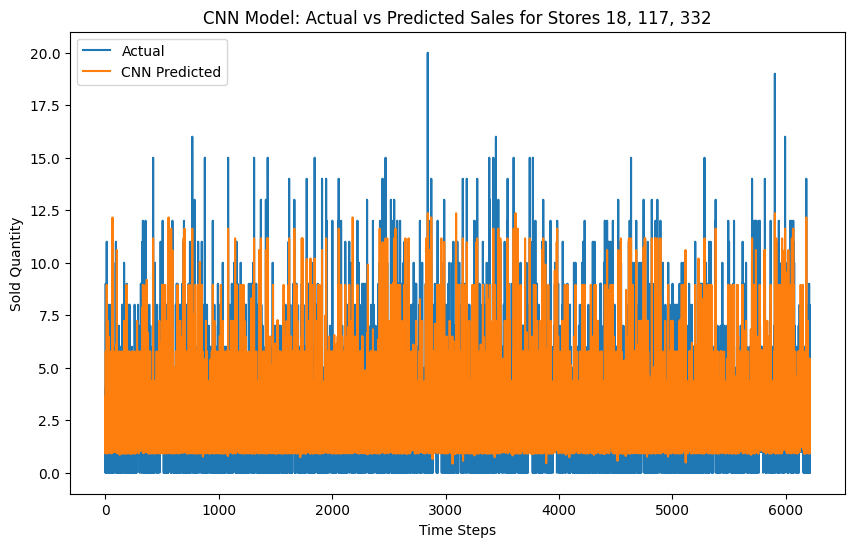

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_cnn = model.predict(X_test)

y_pred_cnn = scaler.inverse_transform(y_pred_cnn).reshape(-1)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(y_pred_cnn, label='CNN Predicted')
plt.title('CNN Model: Actual vs Predicted Sales for Stores 18, 117, 332')
plt.xlabel('Time Steps')
plt.ylabel('Sold Quantity')
plt.legend()
plt.show()

Epoch 1/10
622/622 [==============================] - 11s 9ms/step - loss: 0.0231 - val_loss: 0.0187
Epoch 2/10
622/622 [==============================] - 7s 11ms/step - loss: 0.0185 - val_loss: 0.0182
Epoch 3/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0177 - val_loss: 0.0179
Epoch 4/10
622/622 [==============================] - 6s 9ms/step - loss: 0.0175 - val_loss: 0.0178
Epoch 5/10
622/622 [==============================] - 6s 9ms/step - loss: 0.0172 - val_loss: 0.0173
Epoch 6/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0169 - val_loss: 0.0171
Epoch 7/10
622/622 [==============================] - 7s 11ms/step - loss: 0.0168 - val_loss: 0.0172
Epoch 8/10
622/622 [==============================] - 5s 8ms/step - loss: 0.0166 - val_loss: 0.0168
Epoch 9/10
622/622 [==============================] - 6s 10ms/step - loss: 0.0165 - val_loss: 0.0165
Epoch 10/10
195/195 [==============================] - 1s 3ms/step
Epoch 1/10
622/622 [=========

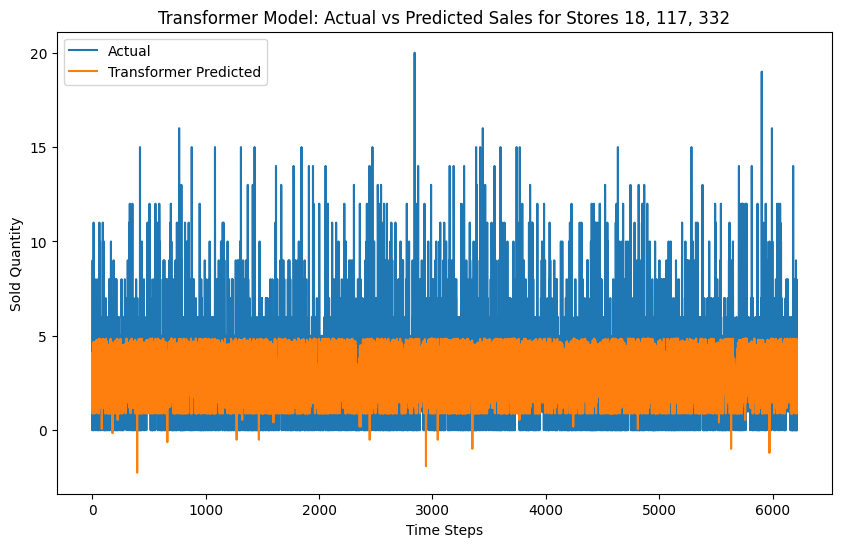

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

file_path = 'Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(ff_dim, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(inputs.shape[-1])(x)
    return x + res

def create_model(input_shape, num_layers, head_size, num_heads, ff_dim, dropout):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

input_shape = (X_train.shape[1], 1)
num_layers = 2
head_size = 64
num_heads = 4
ff_dim = 64

learning_rates = [1e-4, 1e-3]
dropouts = [0.1, 0.2]
best_rmse = float("inf")
best_params = {}

for lr in learning_rates:
    for do in dropouts:
        model = create_model(input_shape, num_layers, head_size, num_heads, ff_dim, do)
        model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), loss="mean_squared_error")

        history = model.fit(
            X_train, y_train,
            epochs=10,
            batch_size=32,
            validation_split=0.2,
            verbose=1
        )


        y_pred = model.predict(X_test)
        y_pred_rescaled = scaler.inverse_transform(y_pred).reshape(-1)
        y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
        rmse = sqrt(mean_squared_error(y_test_original_scale, y_pred_rescaled))


        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'learning_rate': lr, 'dropout': do}


        tf.keras.backend.clear_session()

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

model = create_model(input_shape, num_layers, head_size, num_heads, ff_dim, best_params['dropout'])
model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_params['learning_rate']), loss="mean_squared_error")

model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2
)

y_pred_final = model.predict(X_test)
y_pred_final_rescaled = scaler.inverse_transform(y_pred_final).reshape(-1)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_scale, label='Actual')
plt.plot(y_pred_final_rescaled, label='Transformer Predicted')
plt.title('Transformer Model: Actual vs Predicted Sales for Stores 18, 117, 332')
plt.xlabel('Time Steps')
plt.ylabel('Sold Quantity')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

features_count = X_scaled.shape[1]

X_train = X_train.reshape((X_train.shape[0], 1, features_count))
X_test = X_test.reshape((X_test.shape[0], 1, features_count))

model = Sequential()
model.add(LSTM(50, input_shape=(1, features_count)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

def predict_n_days(model, last_known_batch, n_steps, scaler):
    predictions = []
    current_batch = last_known_batch

    for _ in range(n_steps):
        current_pred = model.predict(current_batch)

        predictions.append(current_pred[0, 0])

        current_batch[0, :, :] = np.append(current_batch[0, :, 1:], current_pred)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    return predictions


last_known_batch = X_test[-1:].reshape(1, 1, features_count)

predictions_1_day = predict_n_days(model, last_known_batch, 1, scaler)
predictions_3_days = predict_n_days(model, last_known_batch, 3, scaler)
predictions_10_days = predict_n_days(model, last_known_batch, 10, scaler)

print(f"1 day ahead prediction: {predictions_1_day[0]}")
print(f"3 days ahead prediction: {predictions_3_days[2]}")
print(f"10 days ahead prediction: {predictions_10_days[9]}")

Epoch 1/50
777/777 [==============================] - 6s 6ms/step - loss: 0.0132 - val_loss: 0.0074
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0088 - val_loss: 0.0073
Epoch 3/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 4/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0074
Epoch 5/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 6/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 7/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0072
Epoch 8/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0085 - val_loss: 0.0073
Epoch 9/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 10/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0084 - val_loss: 0.0073

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

features_count = X_scaled.shape[1]

X_train = X_train.reshape((X_train.shape[0], 1, features_count))
X_test = X_test.reshape((X_test.shape[0], 1, features_count))
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, features_count)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

def predict_n_days(model, last_known_batch, n_steps, scaler):
    predictions = []
    current_batch = last_known_batch

    for _ in range(n_steps):
        current_pred = model.predict(current_batch)

        predictions.append(current_pred[0, 0])

        current_batch[0, :, :] = np.append(current_batch[0, :, 1:], current_pred)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    return predictions

last_known_batch = X_test[-1:].reshape(1, 1, features_count)

predictions_1_day = predict_n_days(model, last_known_batch, 1, scaler)
predictions_3_days = predict_n_days(model, last_known_batch, 3, scaler)
predictions_10_days = predict_n_days(model, last_known_batch, 10, scaler)

print(f"1 day ahead prediction: {predictions_1_day[0]}")
print(f"3 days ahead prediction: {predictions_3_days[2]}")
print(f"10 days ahead prediction: {predictions_10_days[9]}")


Epoch 1/50
777/777 [==============================] - 5s 5ms/step - loss: 0.0086 - val_loss: 0.0064
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0072 - val_loss: 0.0067
Epoch 3/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0071 - val_loss: 0.0065
Epoch 4/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 5/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 6/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 7/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 8/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 9/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0064
Epoch 10/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0063

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, Flatten, MultiHeadAttention
from tensorflow.keras.optimizers import Adam

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return x + res

def build_transformer_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = LayerNormalization(epsilon=1e-6)(x)
    x = Flatten()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

model = build_transformer_model(
    input_shape=X_train.shape[1:],
    head_size=64,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(optimizer=Adam(learning_rate=0.001), loss="mean_squared_error")
model.summary()

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

def predict_n_days(model, initial_input, n_steps, scaler):
    predictions = []
    current_batch = initial_input

    for _ in range(n_steps):

        current_pred = model.predict(current_batch)
        predictions.append(current_pred[0, 0])


        current_pred_reshaped = current_pred.reshape(1, 1, -1)

        current_batch = np.append(current_batch[:, :, 1:], current_pred_reshaped, axis=2)

    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1)).reshape(-1)
    return predictions


last_known_batch = X_test[-1:].reshape(1, 1, X_train.shape[2])
predictions_1_day = predict_n_days(model, last_known_batch, 1, scaler)
predictions_3_days = predict_n_days(model, last_known_batch, 3, scaler)
predictions_10_days = predict_n_days(model, last_known_batch, 10, scaler)


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 1, 2)]               0         []                            
                                                                                                  
 layer_normalization_9 (Lay  (None, 1, 2)                 4         ['input_2[0][0]']             
 erNormalization)                                                                                 
                                                                                                  
 multi_head_attention_4 (Mu  (None, 1, 2)                 2818      ['layer_normalization_9[0][0]'
 ltiHeadAttention)                                                  , 'layer_normalization_9[0][0]
                                                                    ']                      

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X.reshape(-1, 1)).reshape(-1, len(features))
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_train_original_scale = scaler.inverse_transform(y_pred_train.reshape(-1, 1)).reshape(-1)
y_pred_test_original_scale = scaler.inverse_transform(y_pred_test.reshape(-1, 1)).reshape(-1)
y_train_original_scale = scaler.inverse_transform(y_train.reshape(-1, 1)).reshape(-1)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

mse_train = mse(y_train_original_scale, y_pred_train_original_scale)
mse_test = mse(y_test_original_scale, y_pred_test_original_scal
print("Accuracy for Training Data: ", mse_train)
print("Accuracy for Test Data: ", mse_test)



Epoch 1/50
777/777 [==============================] - 5s 5ms/step - loss: 0.0155 - val_loss: 0.0103
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0095 - val_loss: 0.0076
Epoch 3/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0089 - val_loss: 0.0074
Epoch 4/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0088 - val_loss: 0.0074
Epoch 5/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 6/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 7/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0087 - val_loss: 0.0073
Epoch 8/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0086 - val_loss: 0.0072
Epoch 9/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0073
Epoch 10/50
777/777 [==============================] - 4s 5ms/step - loss: 0.0086 - val_loss: 0.0074

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt

file_path = '/content/Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)

specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

train_loss = model.evaluate(X_train, y_train, verbose=0)

test_loss = model.evaluate(X_test, y_test, verbose=0)

print(f'Training Accuracy: {train_loss}')
print(f'Testing Accuracy: {test_loss}')



Epoch 1/50
777/777 [==============================] - 4s 4ms/step - loss: 0.0094 - val_loss: 0.0080
Epoch 2/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0072 - val_loss: 0.0064
Epoch 3/50
777/777 [==============================] - 2s 3ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 4/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0065
Epoch 5/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 6/50
777/777 [==============================] - 3s 4ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 7/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0066
Epoch 8/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0068
Epoch 9/50
777/777 [==============================] - 2s 3ms/step - loss: 0.0070 - val_loss: 0.0063
Epoch 10/50
777/777 [==============================] - 3s 3ms/step - loss: 0.0070 - val_loss: 0.0063

Epoch 1/50
777/777 [==============================] - 19s 13ms/step - loss: 0.0182 - val_loss: 0.0157
Epoch 2/50
777/777 [==============================] - 9s 12ms/step - loss: 0.0160 - val_loss: 0.0141
Epoch 3/50
777/777 [==============================] - 9s 11ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 4/50
777/777 [==============================] - 8s 10ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 5/50
777/777 [==============================] - 9s 12ms/step - loss: 0.0155 - val_loss: 0.0138
Epoch 6/50
777/777 [==============================] - 10s 12ms/step - loss: 0.0154 - val_loss: 0.0147
Epoch 7/50
777/777 [==============================] - 8s 10ms/step - loss: 0.0154 - val_loss: 0.0136
Epoch 8/50
777/777 [==============================] - 9s 12ms/step - loss: 0.0154 - val_loss: 0.0141
Epoch 9/50
777/777 [==============================] - 9s 12ms/step - loss: 0.0155 - val_loss: 0.0137
Epoch 10/50
777/777 [==============================] - 8s 10ms/step - loss: 0.0155 - val_

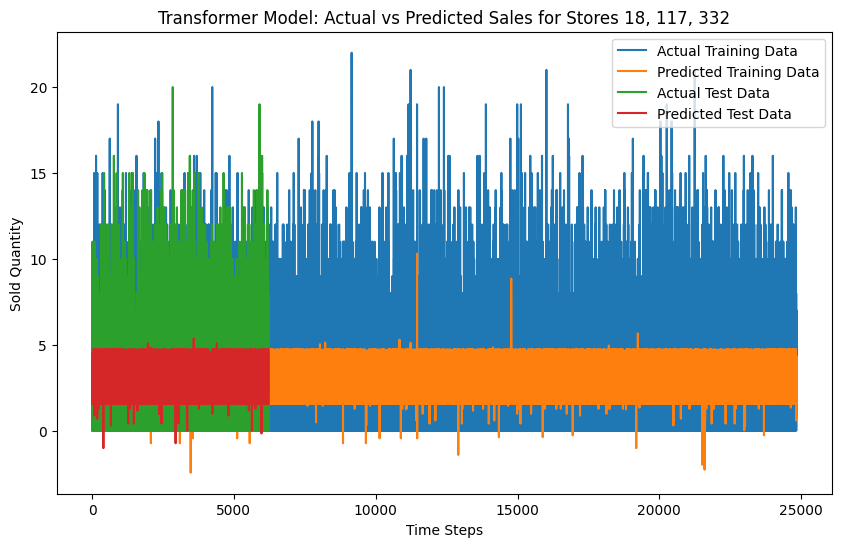

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt


file_path = 'Coffee_Stores_Data.csv'
coffee_data = pd.read_csv(file_path)


specified_stores_data = coffee_data[coffee_data['StoreID'].isin([18, 117, 332])]

features = ['ReceivedQuantity', 'EndQuantity']
target_variable = 'SoldQuantity'

X = specified_stores_data[features].values
y = specified_stores_data[target_variable].values

scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Dense(ff_dim, activation='relu')(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(inputs.shape[-1])(x)
    return x + res

def create_model(input_shape, num_layers, head_size, num_heads, ff_dim, dropout):
    inputs = keras.Input(shape=input_shape)
    x = inputs

    for _ in range(num_layers):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Hyperparameters
input_shape = (X_train.shape[1], 1)
num_layers = 2
head_size = 64
num_heads = 4
ff_dim = 64
dropout = 0.2
learning_rate = 1e-3


model = create_model(input_shape, num_layers, head_size, num_heads, ff_dim, dropout)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mean_squared_error")

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

y_train_pred = model.predict(X_train)
y_train_pred_rescaled = scaler.inverse_transform(y_train_pred).reshape(-1)
y_train_original_scale = scaler.inverse_transform(y_train.reshape(-1, 1)).reshape(-1)
train_rmse = sqrt(mean_squared_error(y_train_original_scale, y_train_pred_rescaled))

y_pred_final = model.predict(X_test)
y_pred_final_rescaled = scaler.inverse_transform(y_pred_final).reshape(-1)
y_test_original_scale = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)
test_rmse = sqrt(mean_squared_error(y_test_original_scale, y_pred_final_rescaled))


print(f"Training RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")

plt.figure(figsize=(10, 6))
plt.plot(y_train_original_scale, label='Actual Training Data')
plt.plot(y_train_pred_rescaled, label='Predicted Training Data')
plt.plot(y_test_original_scale, label='Actual Test Data')
plt.plot(y_pred_final_rescaled, label='Predicted Test Data')
plt.title('Transformer Model: Actual vs Predicted Sales for Stores 18, 117, 332')
plt.xlabel('Time Steps')
plt.ylabel('Sold Quantity')
plt.legend()
plt.show()


In [ ]:
# 9. For individual store data, teams 1-10 focus on the first 13 products
# focus on the second 14 products. Eliminate the products that are not common between


import pandas as pd

file_path = '/content/Updated_Coffee_Stores_Data.csv'
data = pd.read_csv(file_path)

stores = [18, 117, 332]
data_filtered = data[data['StoreID'].isin(stores)]

product_ids_team_1 = data_filtered['PLU'].unique()[:13]

common_products_team_1 = data_filtered[data_filtered['PLU'].isin(product_ids_team_1)].groupby('PLU').filter(lambda x: len(x['StoreID'].unique()) == len(stores))

print(f"Common products : {common_products_team_1.head()}")

Common products :        StoreID BusinessDate      PLU                             Description  \
39461       18   2019-06-29  3000227                        Caprese Sandwich   
39462       18   2019-06-29   830620                Honey Raisin Bran Muffin   
39463       18   2019-06-29     6228   Pressed Juicery Spicy Greens w Ginger   
39464       18   2019-06-29    12216                         Vive Juice Shot   
39465       18   2019-06-29  3000277  Mixed Berries & Granola Yogurt Parfait   

         ItemType CategoryLvl1Desc CategoryLvl2Desc  CategoryLvl3Desc  \
39461  Unassigned             Food        Cold Case      Ready to Eat   
39462        Core             Food        Bake Case  Muffins & Scones   
39463  Unassigned             Food        Cold Case    Ready to Drink   
39464  Unassigned             Food        Cold Case    Ready to Drink   
39465  Unassigned             Food        Cold Case      Ready to Eat   

       ReceivedQuantity  SoldQuantity  EndQuantity  LatestOrde

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


data = pd.read_csv('/content/Coffee_Stores_Data.csv')
analyzed_stores = [18, 117, 332]

new_stores = data[~data['StoreID'].isin(analyzed_stores)]['StoreID'].unique()[:10]

new_stores_data = data[data['StoreID'].isin(new_stores)]

new_stores_data['BusinessDate'] = pd.to_datetime(new_stores_data['BusinessDate'])
new_stores_data['Year'] = new_stores_data['BusinessDate'].dt.year
new_stores_data['Month'] = new_stores_data['BusinessDate'].dt.month
new_stores_data['Day'] = new_stores_data['BusinessDate'].dt.day

new_stores_data = new_stores_data.drop(['BusinessDate', 'StoreID', 'PLU', 'Description', 'Temperature'], axis=1)

new_stores_data = pd.get_dummies(new_stores_data)

X = new_stores_data.drop('SoldQuantity', axis=1)
y = new_stores_data['SoldQuantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

model = {
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

for name, model in model.items():
    model.fit(X_train_imputed, y_train)
    y_pred = model.predict(X_test_imputed)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} (Imputed) - RMSE: {rmse}, R-squared: {r2}")

<ipython-input-12-11200ba9a4cb>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stores_data['BusinessDate'] = pd.to_datetime(new_stores_data['BusinessDate'])
<ipython-input-12-11200ba9a4cb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_stores_data['Year'] = new_stores_data['BusinessDate'].dt.year
<ipython-input-12-11200ba9a4cb>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

XGBoost (Imputed) - RMSE: 0.9669117993837459, R-squared: 0.8565003862114504


In [1]:
pip install explainerdashboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.2/221.2 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.4/145.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from explainerdashboard import RegressionExplainer, ExplainerDashboard

data = pd.read_csv('/content/Coffee_Stores_Data.csv')
analyzed_stores = [18, 117, 332]
new_stores = data[~data['StoreID'].isin(analyzed_stores)]['StoreID'].unique()[:10]
new_stores_data = data[data['StoreID'].isin(new_stores)]
new_stores_data.loc[:, 'BusinessDate'] = pd.to_datetime(new_stores_data['BusinessDate'])
new_stores_data.loc[:, 'Year'] = new_stores_data['BusinessDate'].dt.year
new_stores_data.loc[:, 'Month'] = new_stores_data['BusinessDate'].dt.month
new_stores_data.loc[:, 'Day'] = new_stores_data['BusinessDate'].dt.day

new_stores_data = new_stores_data.drop(['BusinessDate', 'StoreID', 'PLU', 'Description', 'Temperature'], axis=1)
new_stores_data = pd.get_dummies(new_stores_data)

X = new_stores_data.drop('SoldQuantity', axis=1)
y = new_stores_data['SoldQuantity']
select_features = X.columns
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)
y_pred = model.predict(X_test_imputed)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"XGBoost (Imputed) - RMSE: {rmse}, R-squared: {r2}")
X_test_df = pd.DataFrame(X_test_imputed, columns=select_features)

explainer = RegressionExplainer(model, X_test_df, y_test)

db = ExplainerDashboard(explainer, title="Regression Dashboard")
db.run(port=8052)


<ipython-input-1-8607463ee760>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1-8607463ee760>:16: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
<ipython-input-1-8607463ee760>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-1-8607463ee760>:18: SettingWithCo

XGBoost (Imputed) - RMSE: 0.9669117993837459, R-squared: 0.8565003862114504
Changing class type to XGBRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:27:43] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


Building ExplainerDashboard..
Detected google colab environment, setting mode='external'
Generating layout...
Calculating shap values...


/usr/local/lib/python3.10/dist-packages/dash/dash.py:538: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Generating xgboost model dump...
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://172.28.0.12:8052
You can terminate the dashboard with ExplainerDashboard.terminate(8052)
Dash app running on:


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>